# Cholera Disease Analysis (1949-2016)

**Name: Suraj Prakash Sharma**  
**Batch: Data Science**  
**Enrollment Number: BLENP2DSC20038**  

## 1. Introduction  
* Cholera is a disease caused by toxigenic bacteria known as **Vibrio Cholerae Serogroup O1 or O139** that produce a watery diarrhea and vomitting that can rapidly lead to dehydration. It is an acute diarrhoeal disease that can kill within hours if left untreated. An estimated 2.9 million cases and 95,000 deaths occur i.e. **3.3% CFR** each year around the world.  

![Cholera Bacteria Image](https://github.com/strikersps/Cholera-Disease-Analysis/blob/main/Cholera-Virus-Image-Under-Electron-Microscope.jpg)  



* Globally, Cholera cases have increased steadily since 2005 and the disease still occurs in many places including Africa, Southeast Asia, and Haiti. Centre For Disease Control (CDC) responds to cholera outbreaks across the world using its Global Water, Sanitation and Hygiene (WASH) expertise. 

* Cholera can be life-threatening but it is **easily prevented and treated**. Travelers, public health and medical professionals and outbreak responders should be aware of areas with high rates of cholera, know how the disease spreads, and what to do to prevent it.  

* Cholera infection is often mild or without symptoms, but can be severe. It usually takes 2-3 days for a person's body to start showing the symptoms after a person ingests cholera bacteria, but the time can range from a few hours to 5 days. Approximately 1 in 10 people who get sick with cholera will develop severe symptoms such as:  
    * Watery Diarrhea, 
    * Vomiting, 
    * Leg Cramps,  
    * Rapid Heart Rate
    * Loss of Skin Elasticity,
    * Dry Mucous Membranes,
    * Low Blood Pressure,
    * Thirst, 
    * Muscle Cramps, and
    * Restlessness or Irritability
* In these people, rapid loss of body fluids leads to dehydration and shock and **without treatment, death can occur within hours.**  

**Vaccines**  
* According to WHO, many countries are now integrating the use of Oral Cholera Vaccine (OCV) within their cholera control programs. Till May 2018 over 25M doses have been administered through mass vaccination campaigns in 19 countries since the stockpile was created in 2013.

## 2. Objective
* The goal of this project is to create awareness and to understand the spread of Cholera disease globally using `R` progarmming language and also what measures we can take to eradicate the disease which is killing people since 1850's by developing the required healthcare infrastructure and accessibility to clean drinking water and vaccines.

## 3. Importing Libraries

* The libraries on which the dependencies are `dplyr`, `tidyr`, `repr`, `ggplot2`, `patchwork`, `countrycode`.
* `dplyr` and `tidyr` are for the data analysis and data manipulation.  
* `repr`, `ggplot`, `patchwork` are great libraries for data visualisation in `R`. [`patchwork`](https://patchwork.data-imaginist.com/index.html) makes the development of creating subplots very simple by using operators.  
* [`countrycode`](https://github.com/vincentarelbundock/countrycode) libraries allows me to extract the geographical information from the country name.

In [1]:
library(dplyr)
library(tidyr)
library(repr)
library(ggplot2)
options(repr.plot.width = 16, repr.plot.height = 9)
library(patchwork)
library(countrycode)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## 4. About Dataset
* The dataset consists of information about the total number of cases, deaths and fatality rate (CFR) for the cholera disease from 1949-2016.  
* The dataset is made available by World Health Organisation (WHO) and hence downloaded from there website i.e. **https://apps.who.int/gho/data/node.main.174?lang=en**

In [2]:
cholera_dataset_path <- "./Datasets"
getwd()
setwd(cholera_dataset_path)

[1] "/home/striker/Desktop/Amrita-Data-Science-Course (M-Tech)/Semester-II/Data-Visualisation/Project/Cholera-Disease-Analysis"

## 3. Data Preprocessing  
* This step is all about removing/replacing the unecessary/redundant information present in the dataset.  
* As the Cholera dataset is distributed into 3 different `.csv` files namely:
    * `Reported-Cases-Till-2016.csv` which contains the cases count on an annual basis.
    * `Number-of-Deaths-Till-2016.csv` which contain the deaths count on an annual basis.
    * `Fatality-Rate-Till-2016.csv` which contains the fatality rate on an annual basis. Fatality rate is sometimes also referred as Case Fatality Rate i.e. $CFR = 1 - \text{Recovery Rate}$.

### 3.1 Loading the Annual Reported Cases `csv` file.

In [3]:
cholera_cases_df <- read.csv("Reported-Cases-Till-2016.csv", stringsAsFactors = F)
names(cholera_cases_df) <- c('country', 'year', 'number_of_reported_cases')
filter(cholera_cases_df, number_of_reported_cases == "3 5")
cholera_df <- mutate(cholera_cases_df, 
                     number_of_reported_cases = replace(number_of_reported_cases, 
                                                        number_of_reported_cases == "3 5", 35))
cholera_cases_df <- transform(cholera_cases_df, 
                              number_of_reported_cases = as.integer(number_of_reported_cases))
head(cholera_cases_df, 10)

country,year,number_of_reported_cases
<chr>,<int>,<chr>
Iraq,2016,3 5


Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”


,country,year,number_of_reported_cases
,<chr>,<int>,<int>
1,Afghanistan,2016,677
2,Afghanistan,2015,58064
3,Afghanistan,2014,45481
4,Afghanistan,2013,3957
5,Afghanistan,2012,12
6,Afghanistan,2011,3733
7,Afghanistan,2010,2369
8,Afghanistan,2009,662
9,Afghanistan,2008,4384


### 3.2 Loading the Annual Number of Deaths `.csv` file.

In [4]:
cholera_deaths_df <- read.csv("Number-of-Deaths-Till-2016.csv", stringsAsFactors = F)
names(cholera_deaths_df) <- c('country', 'year', 'number_of_reported_deaths')
filter(cholera_deaths_df, number_of_reported_deaths == "0 0")
cholera_deaths_df <- mutate(cholera_deaths_df, 
                            number_of_reported_deaths = replace(number_of_reported_deaths, 
                                                                number_of_reported_deaths == "0 0", NA))
cholera_deaths_df <- transform(cholera_deaths_df, number_of_reported_deaths = as.integer(number_of_reported_deaths))
head(cholera_deaths_df, 10)

country,year,number_of_reported_deaths
<chr>,<int>,<chr>
Iraq,2016,0 0


Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”


,country,year,number_of_reported_deaths
,<chr>,<int>,<int>
1,Afghanistan,2016,5
2,Afghanistan,2015,8
3,Afghanistan,2014,4
4,Afghanistan,2013,14
5,Afghanistan,2012,0
6,Afghanistan,2011,44
7,Afghanistan,2010,10
8,Afghanistan,2009,11
9,Afghanistan,2008,22


### 3.3 Loading the Annual Fatality Rate `.csv` file.

In [5]:
cholera_fatality_rate_df <- read.csv("Fatality-Rate-Till-2016.csv", stringsAsFactors = F)
names(cholera_fatality_rate_df) <- c('country', 'year', 'fatality_rate')
filter(cholera_fatality_rate_df, fatality_rate == "Unknown" | fatality_rate == "0.0 0.0")
cholera_fatality_rate_df <- mutate(cholera_fatality_rate_df, 
                                   fatality_rate = replace(fatality_rate, (fatality_rate == "Unknown" | fatality_rate == "0.0 0.0"), NA))
cholera_fatality_rate_df <- transform(cholera_fatality_rate_df, fatality_rate = as.numeric(fatality_rate))
head(cholera_fatality_rate_df, 10)

country,year,fatality_rate
<chr>,<int>,<chr>
Germany,2016,Unknown
Iraq,2016,0.0 0.0


,country,year,fatality_rate
,<chr>,<int>,<dbl>
1,Afghanistan,2016,0.70
2,Afghanistan,2015,0.01
3,Afghanistan,2014,0.00
4,Afghanistan,2013,0.35
5,Afghanistan,2012,0.10
6,Afghanistan,2011,1.18
7,Afghanistan,2010,0.42
8,Afghanistan,2009,1.66
9,Afghanistan,2008,0.50


### 3.4 Merging all the three `.csv` files or dataframes into one single dataframe using `merge()` method by applying outer-join.

In [6]:
cholera_df <- merge(cholera_cases_df, cholera_deaths_df, 
                    by = c('country', 'year'), all = T) %>% merge(cholera_fatality_rate_df, 
                                                                  by = c('country', 'year'), all = T)
head(cholera_df, 10)

,country,year,number_of_reported_cases,number_of_reported_deaths,fatality_rate
,<chr>,<int>,<int>,<int>,<dbl>
1,Afghanistan,1960,887,199,22.44
2,Afghanistan,1965,218,55,25.23
3,Afghanistan,1993,37046,931,2.51
4,Afghanistan,1994,38735,118,0.30
5,Afghanistan,1995,19903,624,3.14
6,Afghanistan,1997,4170,125,3.00
7,Afghanistan,1998,10000,0,0.00
8,Afghanistan,1999,24639,152,0.62
9,Afghanistan,2000,4330,198,4.57


### 3.5 Analysing the presence of Missing/Redundant Values in the final dataframe.

In [7]:
na_count <- data.frame(sapply(cholera_df, function(col_name) sum(is.na(col_name))))
names(na_count) <- "missing_value_count"
print(paste("Total Missing Values in the dataset: ", sum(na_count$missing_value_count)))
na_count

[1] "Total Missing Values in the dataset:  271"


,missing_value_count
,<int>
country,0
year,0
number_of_reported_cases,23
number_of_reported_deaths,119
fatality_rate,129


In [8]:
cholera_df <- replace_na(cholera_df, list(number_of_reported_cases = 0, 
                                          number_of_reported_deaths = 0, 
                                          fatality_rate = 0.0))
na_count <- data.frame(sapply(cholera_df, function(col_name) sum(is.na(col_name))))
names(na_count) <- "missing_value_count"
na_count

,missing_value_count
,<int>
country,0
year,0
number_of_reported_cases,0
number_of_reported_deaths,0
fatality_rate,0


In [9]:
filter(cholera_df, country == "Argentina")

country,year,number_of_reported_cases,number_of_reported_deaths,fatality_rate
<chr>,<int>,<dbl>,<dbl>,<dbl>
Argentina,1992,0,15,0.00
Argentina,1993,2350,34,1.45
Argentina,1994,889,15,1.69
Argentina,1995,188,1,0.53
Argentina,1996,474,5,1.05
Argentina,1997,637,12,1.88
Argentina,1998,12,0,0.00


In [10]:
cholera_df$number_of_reported_deaths[cholera_df$country == "Argentina" & cholera_df$year == 1992] <- 0

In [11]:
filter(cholera_df, country == "Argentina")

country,year,number_of_reported_cases,number_of_reported_deaths,fatality_rate
<chr>,<int>,<dbl>,<dbl>,<dbl>
Argentina,1992,0,0,0.00
Argentina,1993,2350,34,1.45
Argentina,1994,889,15,1.69
Argentina,1995,188,1,0.53
Argentina,1996,474,5,1.05
Argentina,1997,637,12,1.88
Argentina,1998,12,0,0.00


In [12]:
cholera_df <- mutate(cholera_df, 
                     reported_recovered = number_of_reported_cases - number_of_reported_deaths, 
                     reported_recovery_rate = 100 * ((number_of_reported_cases - number_of_reported_deaths) / number_of_reported_cases))

In [13]:
head(cholera_df)

,country,year,number_of_reported_cases,number_of_reported_deaths,fatality_rate,reported_recovered,reported_recovery_rate
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,1960,887,199,22.44,688,77.56483
2,Afghanistan,1965,218,55,25.23,163,74.77064
3,Afghanistan,1993,37046,931,2.51,36115,97.48691
4,Afghanistan,1994,38735,118,0.30,38617,99.69537
5,Afghanistan,1995,19903,624,3.14,19279,96.86479
6,Afghanistan,1997,4170,125,3.00,4045,97.00240


In [14]:
na_count <- data.frame(sapply(cholera_df, function(col_name) sum(is.na(col_name))))
names(na_count) <- "missing_value_count"
print(paste("Total Number of Missing Values in the dataset:", sum(na_count)))
na_count

[1] "Total Number of Missing Values in the dataset: 73"


,missing_value_count
,<int>
country,0
year,0
number_of_reported_cases,0
number_of_reported_deaths,0
fatality_rate,0
reported_recovered,0
reported_recovery_rate,73


In [15]:
cholera_df <- replace_na(cholera_df, list(reported_recovery_rate = 0.0))

In [16]:
head(cholera_df)

,country,year,number_of_reported_cases,number_of_reported_deaths,fatality_rate,reported_recovered,reported_recovery_rate
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,1960,887,199,22.44,688,77.56483
2,Afghanistan,1965,218,55,25.23,163,74.77064
3,Afghanistan,1993,37046,931,2.51,36115,97.48691
4,Afghanistan,1994,38735,118,0.30,38617,99.69537
5,Afghanistan,1995,19903,624,3.14,19279,96.86479
6,Afghanistan,1997,4170,125,3.00,4045,97.00240


In [17]:
na_count <- data.frame(sapply(cholera_df, function(col_name) sum(is.na(col_name))))
names(na_count) <- "Missing-Value-Count"
na_count

,Missing-Value-Count
,<int>
country,0
year,0
number_of_reported_cases,0
number_of_reported_deaths,0
fatality_rate,0
reported_recovered,0
reported_recovery_rate,0


In [18]:
custom_match_country_names <- c("Micronesia (Federated States of)" = "Federated States of Micronesia", "The former state union Serbia and Montenegro" = "State Union of Serbia and Montenegro")
custom_match_country_codes <- c("State Union of Serbia and Montenegro" = "SCG")
custom_match_continent <- c("State Union of Serbia and Montenegro" = "Europe")

cholera_df$country = countrycode(cholera_df$country, 
                                 origin = 'country.name', 
                                 destination = 'cldr.name.en', 
                                 custom_match = custom_match_country_names)
cholera_df$country_iso_code = countrycode(cholera_df$country, 
                                          origin = 'country.name', 
                                          destination = 'iso3c', 
                                          custom_match = custom_match_country_codes)
cholera_df$who_region = countrycode(cholera_df$country, 
                                    origin = 'country.name', 
                                    destination = 'continent', 
                                    custom_match = custom_match_continent)
cholera_df$who_subregion = countrycode(cholera_df$country, 
                                       origin = 'country.name', 
                                       destination = 'region')

head(cholera_df, 10)

,country,year,number_of_reported_cases,number_of_reported_deaths,fatality_rate,reported_recovered,reported_recovery_rate,country_iso_code,who_region,who_subregion
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Afghanistan,1960,887,199,22.44,688,77.56483,AFG,Asia,South Asia
2,Afghanistan,1965,218,55,25.23,163,74.77064,AFG,Asia,South Asia
3,Afghanistan,1993,37046,931,2.51,36115,97.48691,AFG,Asia,South Asia
4,Afghanistan,1994,38735,118,0.30,38617,99.69537,AFG,Asia,South Asia
5,Afghanistan,1995,19903,624,3.14,19279,96.86479,AFG,Asia,South Asia
6,Afghanistan,1997,4170,125,3.00,4045,97.00240,AFG,Asia,South Asia
7,Afghanistan,1998,10000,0,0.00,10000,100.00000,AFG,Asia,South Asia
8,Afghanistan,1999,24639,152,0.62,24487,99.38309,AFG,Asia,South Asia
9,Afghanistan,2000,4330,198,4.57,4132,95.42725,AFG,Asia,South Asia


In [19]:
cholera_country_wise_cases <- cholera_df %>% group_by(country) %>% summarise(country_iso_code = first(country_iso_code), 
                                                                             who_region = first(who_region), 
                                                                             who_subregion = first(who_subregion), 
                                                                             total_cases = sum(number_of_reported_cases)) %>% ungroup() %>% arrange(desc(total_cases))
head(cholera_country_wise_cases)

country,country_iso_code,who_region,who_subregion,total_cases
<chr>,<chr>,<chr>,<chr>,<dbl>
India,IND,Asia,South Asia,1363250
Haiti,HTI,Americas,Latin America & Caribbean,795794
Peru,PER,Americas,Latin America & Caribbean,736195
Congo - Kinshasa,COD,Africa,Sub-Saharan Africa,521607
Indonesia,IDN,Asia,East Asia & Pacific,394945
Mozambique,MOZ,Africa,Sub-Saharan Africa,327913


In [20]:
cholera_country_wise_deaths <- cholera_df %>% group_by(country) %>% summarise(country_iso_code = first(country_iso_code), 
                                                                              who_region = first(who_region), 
                                                                              who_subregion = first(who_subregion), 
                                                                              total_deaths = sum(number_of_reported_deaths)) %>% ungroup() %>% arrange(desc(total_deaths))
head(cholera_country_wise_deaths)

country,country_iso_code,who_region,who_subregion,total_deaths
<chr>,<chr>,<chr>,<chr>,<dbl>
India,IND,Asia,South Asia,509438
Bangladesh,BGD,Asia,South Asia,137429
Indonesia,IDN,Asia,East Asia & Pacific,30600
Congo - Kinshasa,COD,Africa,Sub-Saharan Africa,22457
Nigeria,NGA,Africa,Sub-Saharan Africa,21479
Tanzania,TZA,Africa,Sub-Saharan Africa,12725


In [21]:
cholera_country_wise_recovered <- cholera_df %>% group_by(country) %>% summarise(country_iso_code = first(country_iso_code), 
                                                                                 who_region = first(who_region), 
                                                                                 who_subregion = first(who_subregion), 
                                                                                 total_recovered = sum(reported_recovered)) %>% ungroup()
head(cholera_country_wise_recovered)

country,country_iso_code,who_region,who_subregion,total_recovered
<chr>,<chr>,<chr>,<chr>,<dbl>
Afghanistan,AFG,Asia,South Asia,261202
Albania,ALB,Europe,Europe & Central Asia,601
Algeria,DZA,Africa,Middle East & North Africa,12079
Andorra,AND,Europe,Europe & Central Asia,0
Angola,AGO,Africa,Sub-Saharan Africa,181116
Argentina,ARG,Americas,Latin America & Caribbean,4483


In [22]:
cholera_country_wise_fatality <- cholera_df %>% group_by(country) %>% summarise(country_iso_code = first(country_iso_code), who_region = first(who_region), 
                                                                                who_subregion = first(who_subregion), 
                                                                                avg_fatality = mean(fatality_rate)) %>% ungroup() %>% arrange(desc(avg_fatality))
head(cholera_country_wise_fatality)

country,country_iso_code,who_region,who_subregion,avg_fatality
<chr>,<chr>,<chr>,<chr>,<dbl>
Italy,ITA,Europe,Europe & Central Asia,53.32700
Bangladesh,BGD,Asia,South Asia,27.30295
Oman,OMN,Asia,Middle East & North Africa,22.22250
Myanmar (Burma),MMR,Asia,East Asia & Pacific,17.53289
Cambodia,KHM,Asia,East Asia & Pacific,16.70000
Burkina Faso,BFA,Africa,Sub-Saharan Africa,15.69318


In [23]:
cholera_country_wise_df <- merge(cholera_country_wise_cases, cholera_country_wise_deaths, by = c('country', 'country_iso_code', 'who_region', 'who_subregion'), all = T) %>% merge(cholera_country_wise_recovered, by = c('country', 'country_iso_code', 'who_region', 'who_subregion'), all = T) %>% merge(cholera_country_wise_fatality, by = c('country', 'country_iso_code', 'who_region', 'who_subregion'), all = T) %>% arrange(desc(total_deaths))
cholera_country_wise_df$percentage_death <- 100 * (cholera_country_wise_df$total_deaths / cholera_country_wise_df$total_cases)
cholera_country_wise_df$percentage_recovered <- 100 * (cholera_country_wise_df$total_recovered / cholera_country_wise_df$total_cases)
head(cholera_country_wise_df)

,country,country_iso_code,who_region,who_subregion,total_cases,total_deaths,total_recovered,avg_fatality,percentage_death,percentage_recovered
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,India,IND,Asia,South Asia,1363250,509438,853812,15.148594,37.369375,62.63063
2,Bangladesh,BGD,Asia,South Asia,294647,137429,157218,27.302955,46.641914,53.35809
3,Indonesia,IDN,Asia,East Asia & Pacific,394945,30600,364345,9.098462,7.747914,92.25209
4,Congo - Kinshasa,COD,Africa,Sub-Saharan Africa,521607,22457,499150,6.659487,4.305349,95.69465
5,Nigeria,NGA,Africa,Sub-Saharan Africa,310217,21479,288738,7.721333,6.923863,93.07614
6,Tanzania,TZA,Africa,Sub-Saharan Africa,228048,12725,215323,7.705500,5.579966,94.42003


In [24]:
cholera_country_wise_df <- replace_na(cholera_country_wise_df, 
                                      list(percentage_death = 0.0, percentage_recovered = 100.0))

## 4. Exploratory Data Analysis

In [25]:
death_color_palette <- rev(c("#67000D", "#B11217", "#CB181D", "#E32F27", "#EF3B2C", "#F34A36", "#FB7757", "#FC9F81", "#FCBBA1", "#FDD3C1"))

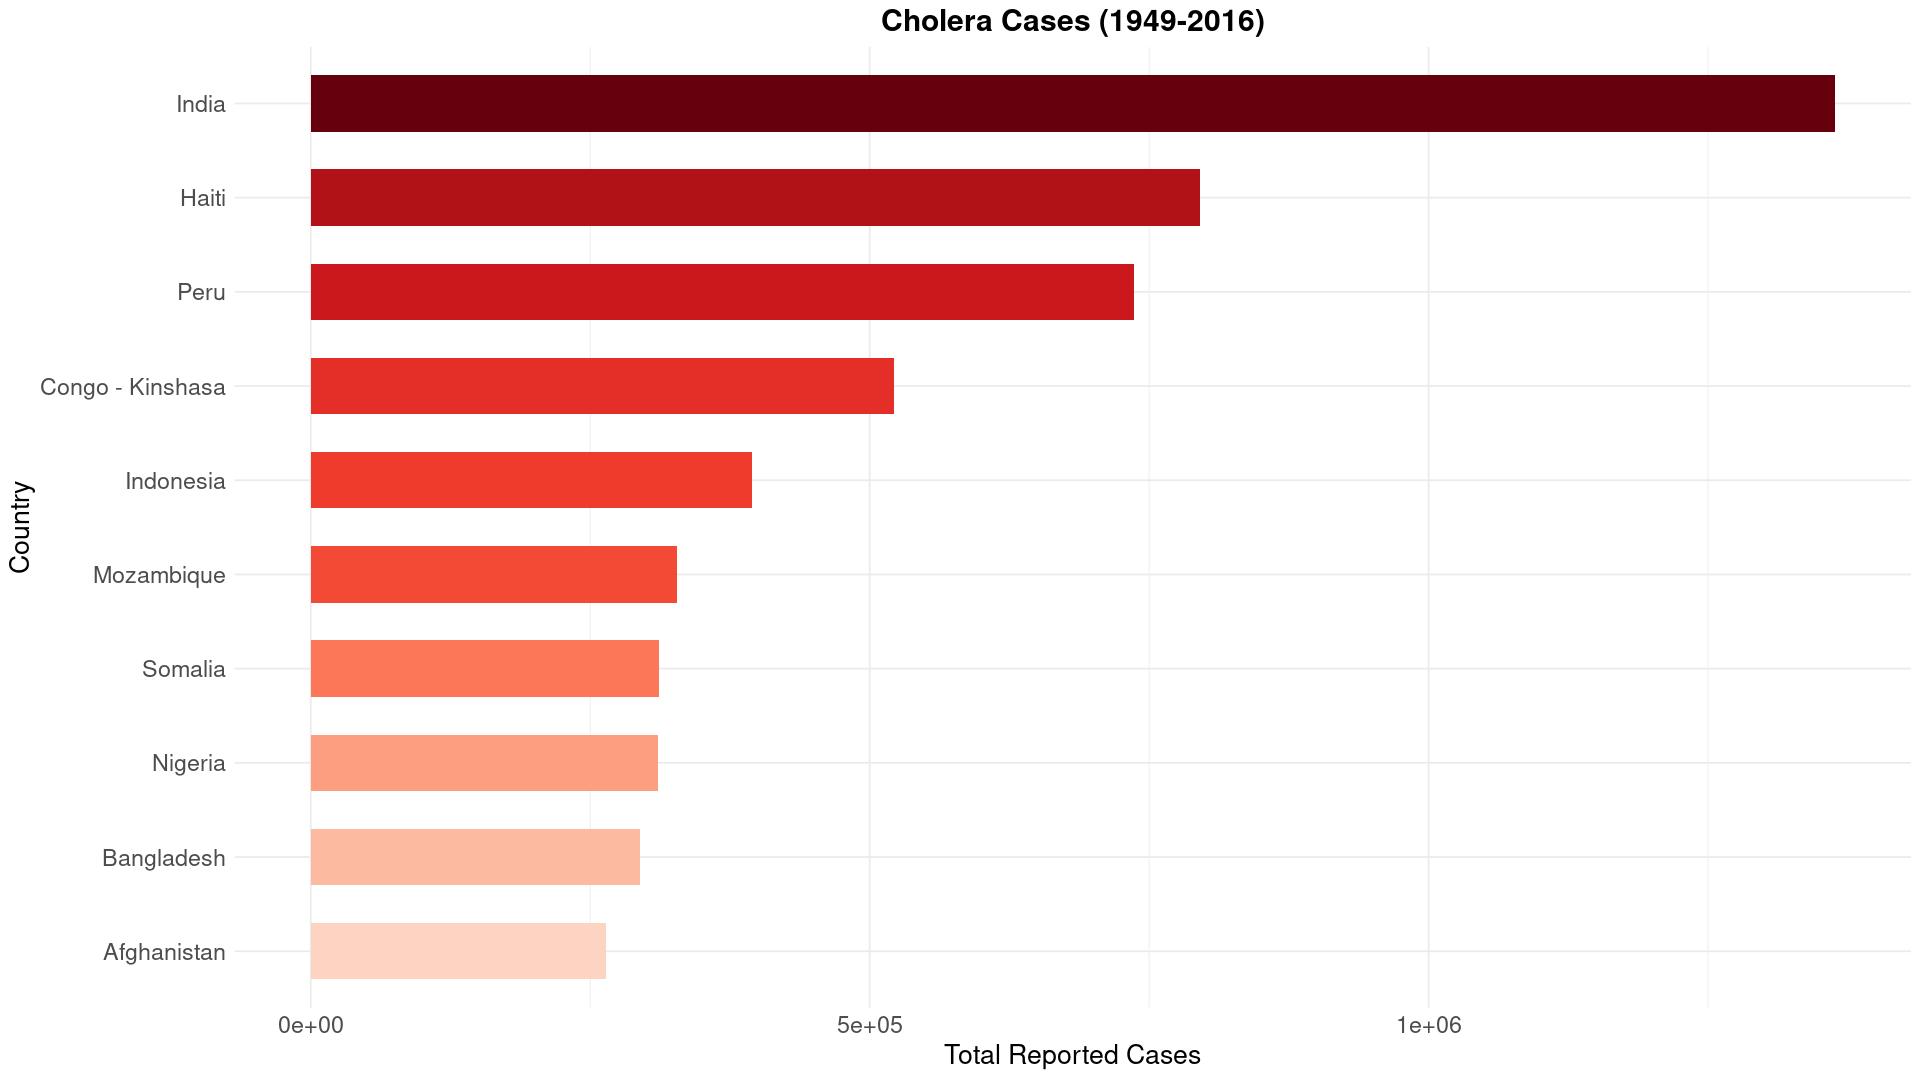

In [26]:
cholera_country_wise_cases <- cholera_country_wise_df %>% arrange(desc(total_cases)) %>% head(10) %>% ggplot(aes(x = reorder(country, total_cases), y = total_cases, fill = factor(total_cases))) + 
    geom_col(width = 0.6) + 
    labs(title = "Cholera Cases (1949-2016)", x = "Country", y = "Total Reported Cases") +
    coord_flip() +
    theme_minimal() +
    scale_fill_manual(values = death_color_palette) +
    theme(axis.text.x = element_text(size = 14, face = 'plain'),
          axis.text.y = element_text(size = 14, face = 'plain'),
          axis.title.x = element_text(size = 16),
          axis.title.y = element_text(size = 16),
          legend.position = "none", 
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5))
cholera_country_wise_cases

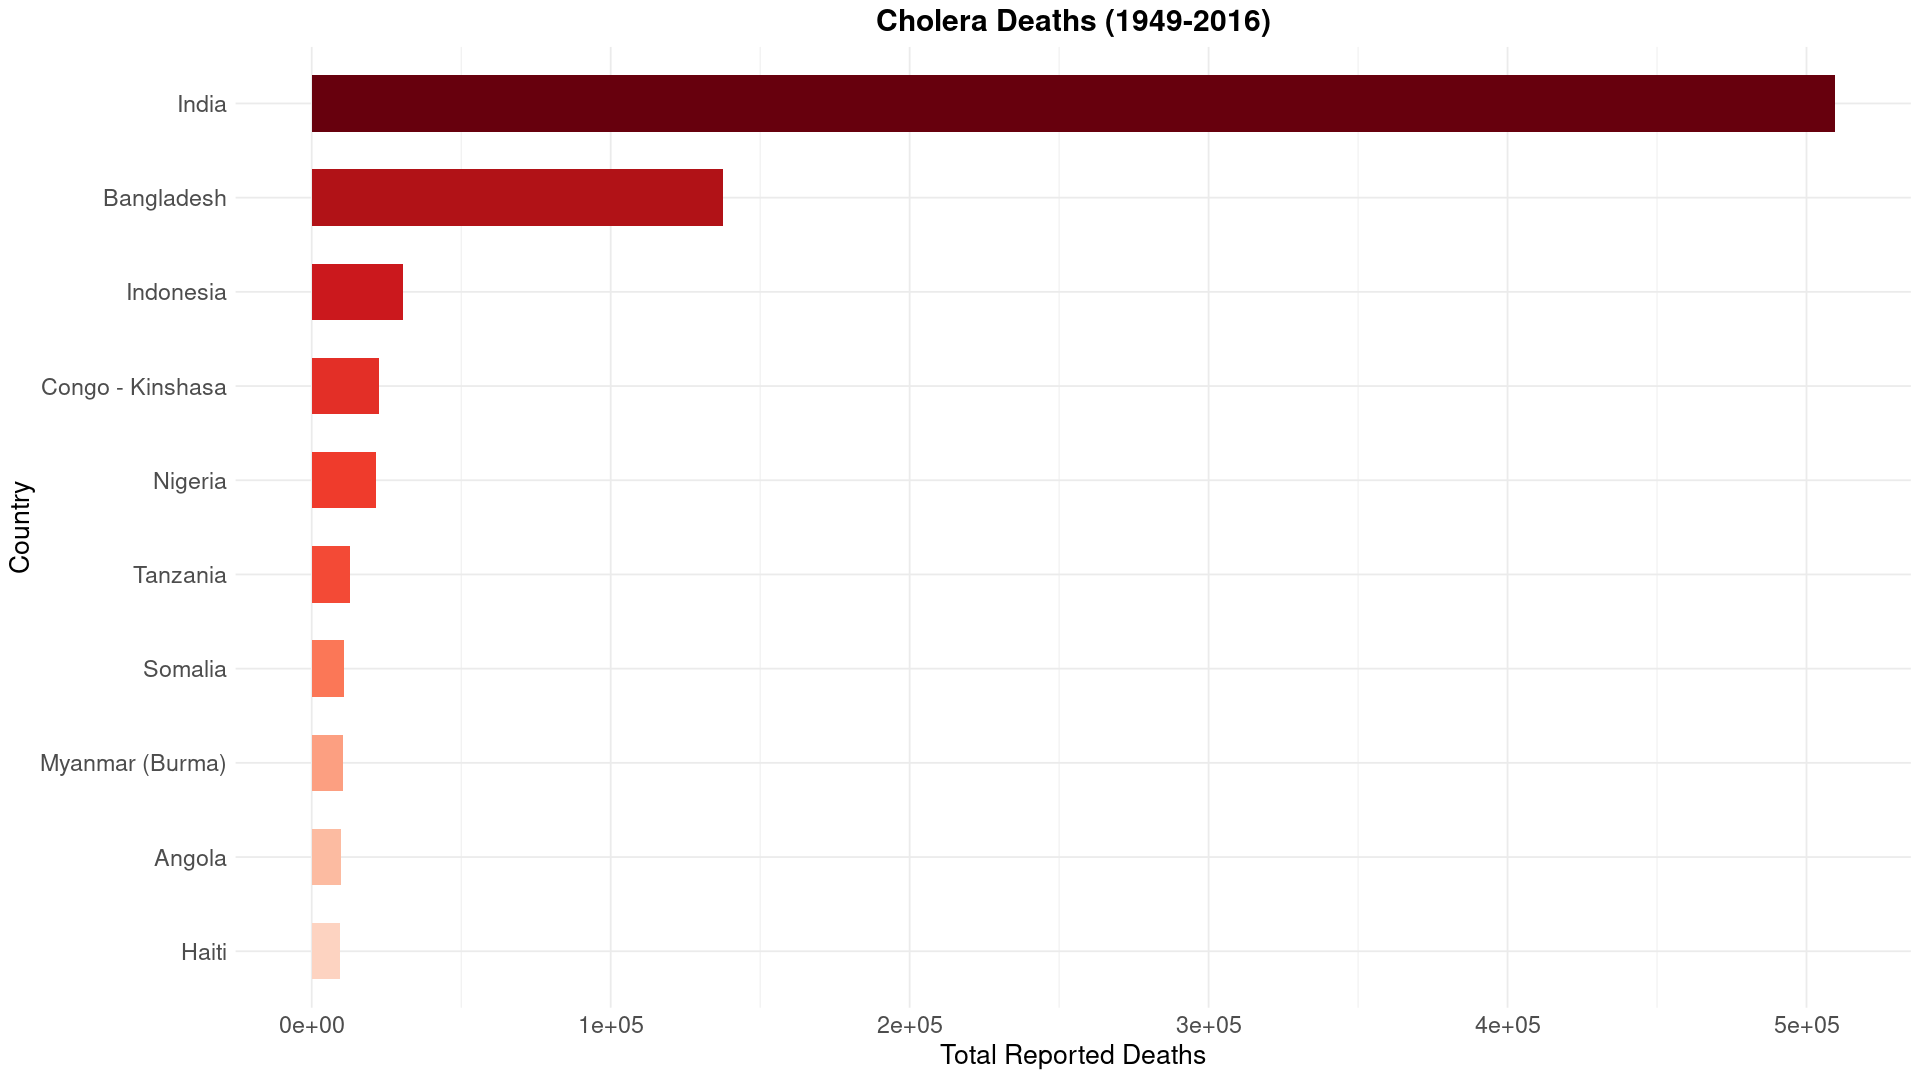

In [27]:
cholera_country_wise_deaths <- cholera_country_wise_df %>% head(10) %>% ggplot(aes(x = reorder(country, total_deaths), y = total_deaths, fill = factor(total_deaths))) + 
    geom_col(width = 0.6) +
    labs(title = "Cholera Deaths (1949-2016)", x = "Country", y = "Total Reported Deaths") +
    coord_flip() +
    theme_minimal() + 
    scale_fill_manual(values = death_color_palette) +
    theme(axis.text.x = element_text(size = 14, face = 'plain'),
          axis.text.y = element_text(size = 14, face = 'plain'),
          axis.title.x = element_text(size = 16),
          axis.title.y = element_text(size = 16),
          legend.position = "none", 
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5))
cholera_country_wise_deaths

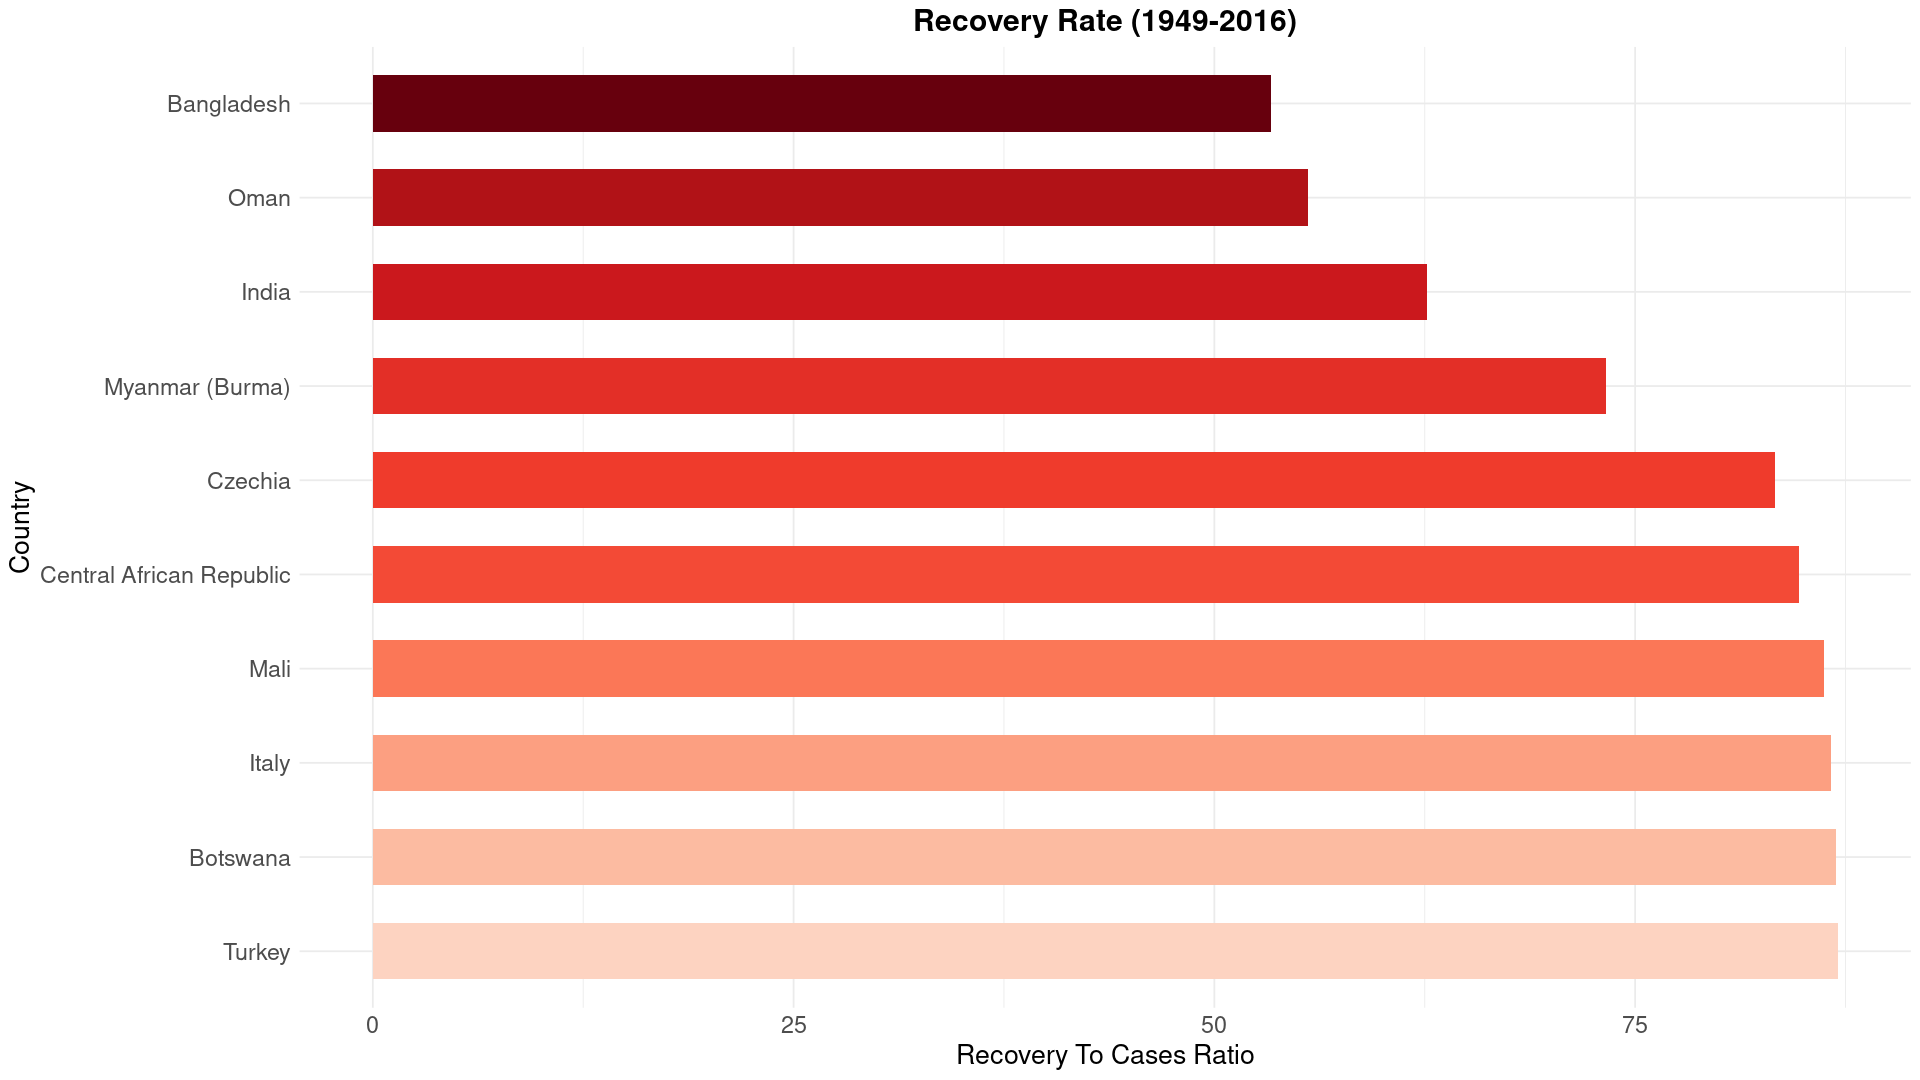

In [28]:
cholera_country_recovery_rate <- cholera_country_wise_df %>% arrange(percentage_recovered) %>% head(10) %>% ggplot(aes(x = reorder(country, -percentage_recovered), y = percentage_recovered, fill = factor(percentage_recovered))) +
    geom_col(width = 0.6) +
    labs(title = "Recovery Rate (1949-2016)", x = "Country", y = "Recovery To Cases Ratio") +
    coord_flip() +
    theme_minimal() +
    scale_fill_manual(values = rev(death_color_palette)) +
    theme(plot.title = element_text(size = 18, face = 'bold', hjust = 0.5), 
          legend.position = 'none', 
          axis.text.x = element_text(size = 14), 
          axis.text.y = element_text(size = 14), 
          axis.title.x = element_text(size = 16), 
          axis.title.y = element_text(size = 16))
cholera_country_recovery_rate

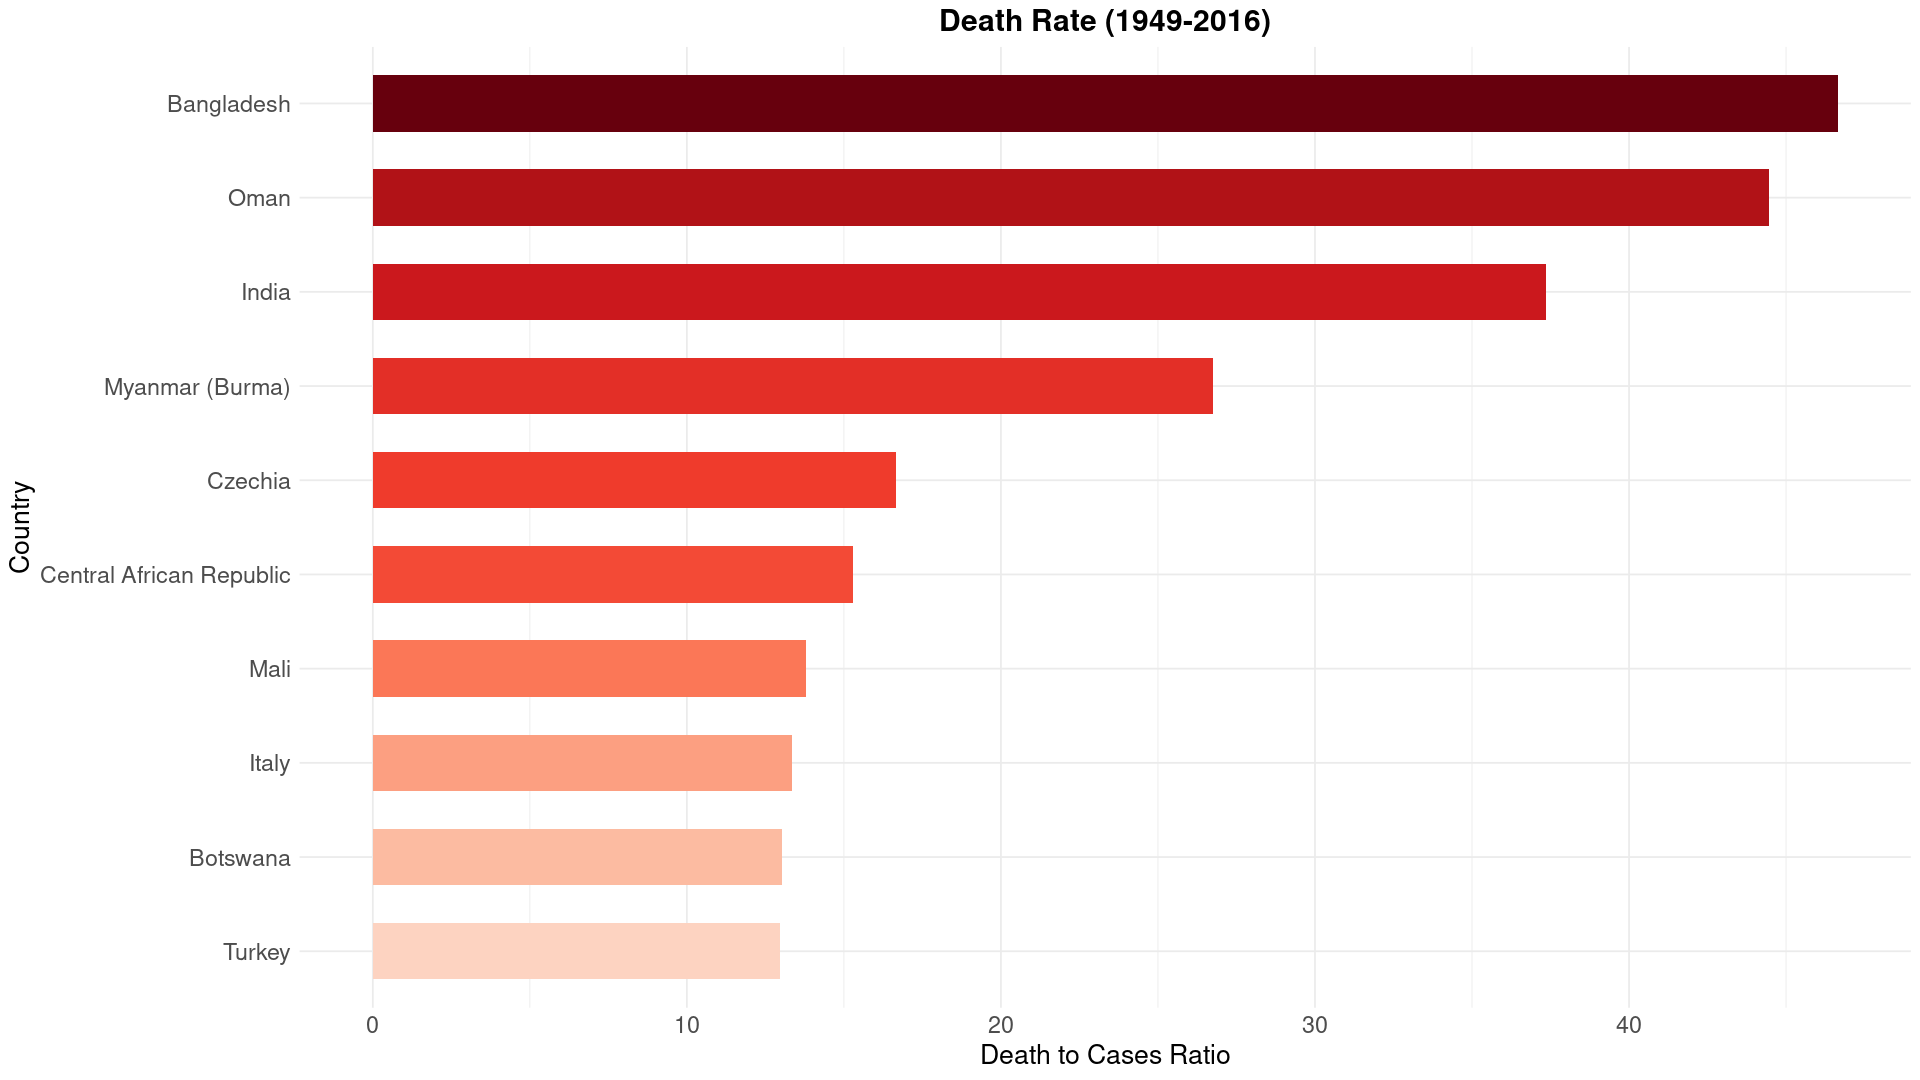

In [29]:
cholera_country_death_rate <- cholera_country_wise_df %>% arrange(desc(percentage_death)) %>% head(10) %>% ggplot(aes(x = reorder(country, percentage_death), y = percentage_death, fill = factor(percentage_death))) +
    geom_col(width = 0.6) +
    labs(title = "Death Rate (1949-2016)", x = "Country", y = "Death to Cases Ratio") +
    coord_flip() +
    theme_minimal() +
    scale_fill_manual(values = death_color_palette) +
    theme(axis.text.x = element_text(size = 14),
          axis.text.y = element_text(size = 14),
          axis.title.x = element_text(size = 16),
          axis.title.y = element_text(size = 16),
          legend.position = "none", 
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5))
cholera_country_death_rate

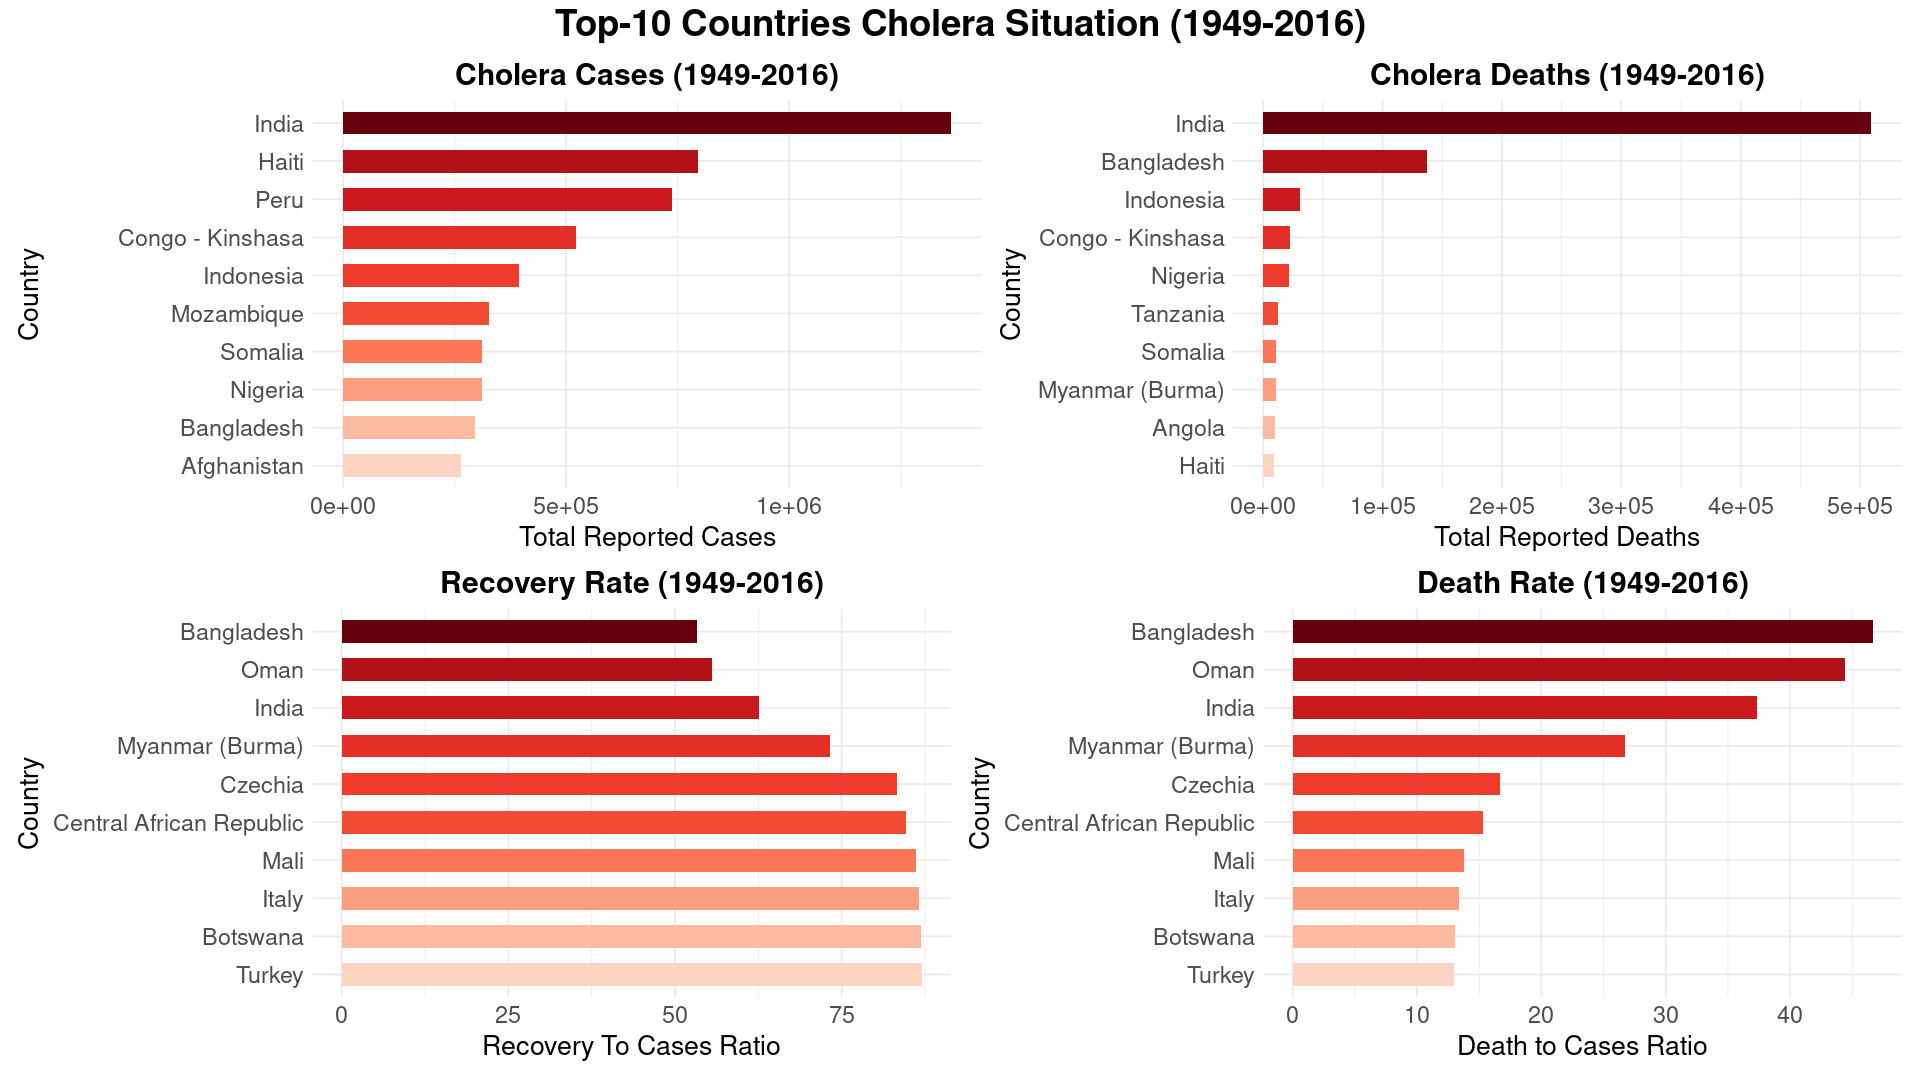

In [30]:
(cholera_country_wise_cases | cholera_country_wise_deaths) / (cholera_country_recovery_rate | cholera_country_death_rate) + 
plot_annotation(title = "Top-10 Countries Cholera Situation (1949-2016)", 
                theme = theme(plot.title = element_text(size = 22, face = 'bold', hjust = 0.5)))

In [31]:
cholera_year_wise_cases = cholera_df %>% group_by(year) %>% summarise(total_cases = sum(number_of_reported_cases)) %>% ungroup() %>% arrange(desc(total_cases))
head(cholera_year_wise_cases)

year,total_cases
<int>,<dbl>
1991,595334
2011,589854
1992,492964
1994,385408
1993,380714
2010,317528


In [32]:
cholera_year_wise_deaths <- cholera_df %>% group_by(year) %>% summarise(total_deaths = sum(number_of_reported_deaths)) %>% ungroup() %>% arrange(desc(total_deaths))
head(cholera_year_wise_deaths)

year,total_deaths
<int>,<dbl>
1953,141173
1952,71397
1958,61836
1951,58661
1957,54853
1956,32523


In [33]:
cholera_year_wise_fatality <- cholera_df %>% group_by(year) %>% summarise(avg_fatality = mean(fatality_rate)) %>% ungroup() %>% arrange(desc(avg_fatality))
head(cholera_year_wise_fatality)

year,avg_fatality
<int>,<dbl>
1954,67.03667
1956,63.48750
1952,63.26000
1949,56.25000
1953,55.87714
1951,54.56833


In [34]:
cholera_year_wise_df <- merge(cholera_year_wise_cases, cholera_year_wise_deaths, by = "year", all = T) %>% merge(cholera_year_wise_fatality, by = "year", all = T) %>% arrange(desc(total_deaths))
cholera_year_wise_df$percentage_death <- 100 * (cholera_year_wise_df$total_deaths / cholera_year_wise_df$total_cases)
cholera_year_wise_df$percentage_recovered <- 100 * ((cholera_year_wise_df$total_cases - cholera_year_wise_df$total_deaths) / cholera_year_wise_df$total_cases)

head(cholera_year_wise_df)

,year,total_cases,total_deaths,avg_fatality,percentage_death,percentage_recovered
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1953,240927,141173,55.87714,58.59576,41.40424
2,1952,123025,71397,63.26000,58.03455,41.96545
3,1958,95763,61836,29.22375,64.57191,35.42809
4,1951,114518,58661,54.56833,51.22426,48.77574
5,1957,63031,54853,50.21750,87.02543,12.97457
6,1956,63542,32523,63.48750,51.18347,48.81653


In [35]:
cholera_year_cases <- cholera_year_wise_df %>% ggplot(aes(x = year, y = total_cases)) +
    geom_col(size = 0.9) +
    labs(title = "Total Cases", x = "Year", y = "Reported Cases") +
    theme_minimal() +
    theme(axis.text.x = element_text(size = 14, vjust = 0.5),
          axis.text.y = element_text(size = 14),
          axis.title.x = element_text(size = 16),
          axis.title.y = element_text(size = 16),
          axis.line = element_line(color = 'grey'),
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5))

In [36]:
cholera_year_deaths <- cholera_year_wise_df %>% ggplot(aes(x = year, y = total_deaths)) +
    geom_col(size = 0.9) +
    labs(title = "Total Deaths", x = "Year", y = "Total Reported Deaths") +
    theme_minimal() +
    theme(axis.text.x = element_text(size = 14), 
          axis.text.y = element_text(size = 14), 
          axis.title.x = element_text(size = 16), 
          axis.title.y = element_text(size = 16), 
          plot.title = element_text(size = 18, face = 'bold', hjust = 0.5), 
          axis.line = element_line(color = 'grey'))

In [37]:
cholera_year_fatality_rate <- cholera_year_wise_df %>% ggplot(aes(x = year)) +
    geom_line(aes(y = avg_fatality), size = 0.9, color = 'red') +
    geom_line(aes(y = percentage_recovered), size = 0.7, color = 'dark green') +
    labs(title = "Fatality Rate Vs Recovered Rate", x = "Year", y = "Recorded Values") +
    theme_minimal() +
    theme(axis.text.x = element_text(size = 14), 
          axis.text.y = element_text(size = 14), 
          axis.title.x = element_text(size = 16), 
          axis.title.y = element_text(size = 16), 
          plot.title = element_text(size = 18, face = 'bold', hjust = 0.5), 
          axis.line = element_line(color = 'grey'))

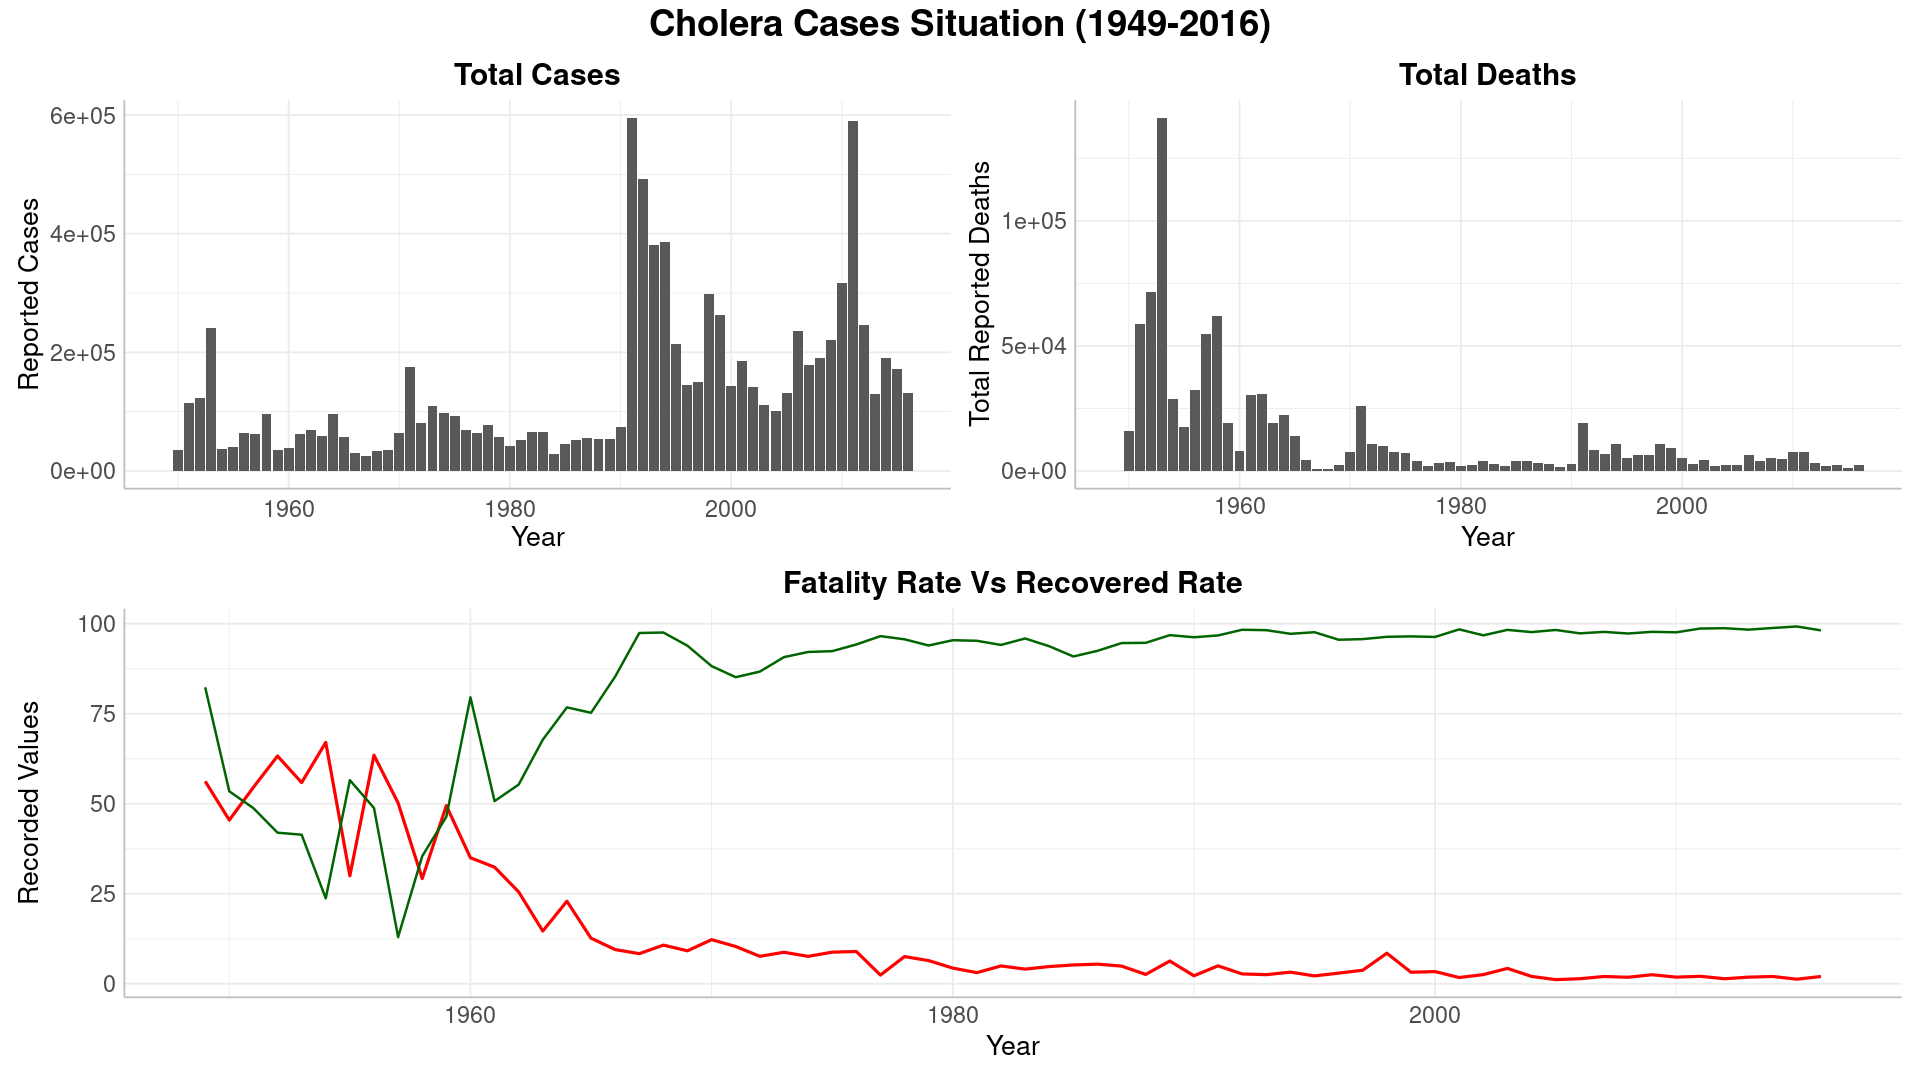

In [38]:
(cholera_year_cases | cholera_year_deaths) / cholera_year_fatality_rate + 
plot_annotation(title = "Cholera Cases Situation (1949-2016)", 
                theme = theme(plot.title = element_text(size = 22, face = 'bold', hjust = 0.5)))

In [39]:
cholera_top_df <- cholera_df %>% filter(country %in% head((arrange(cholera_country_wise_df, desc(total_cases)))$country, 12))
head(cholera_top_df)

,country,year,number_of_reported_cases,number_of_reported_deaths,fatality_rate,reported_recovered,reported_recovery_rate,country_iso_code,who_region,who_subregion
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Afghanistan,1960,887,199,22.44,688,77.56483,AFG,Asia,South Asia
2,Afghanistan,1965,218,55,25.23,163,74.77064,AFG,Asia,South Asia
3,Afghanistan,1993,37046,931,2.51,36115,97.48691,AFG,Asia,South Asia
4,Afghanistan,1994,38735,118,0.30,38617,99.69537,AFG,Asia,South Asia
5,Afghanistan,1995,19903,624,3.14,19279,96.86479,AFG,Asia,South Asia
6,Afghanistan,1997,4170,125,3.00,4045,97.00240,AFG,Asia,South Asia


In [40]:
mode(cholera_top_df$number_of_reported_cases)

[1] "numeric"

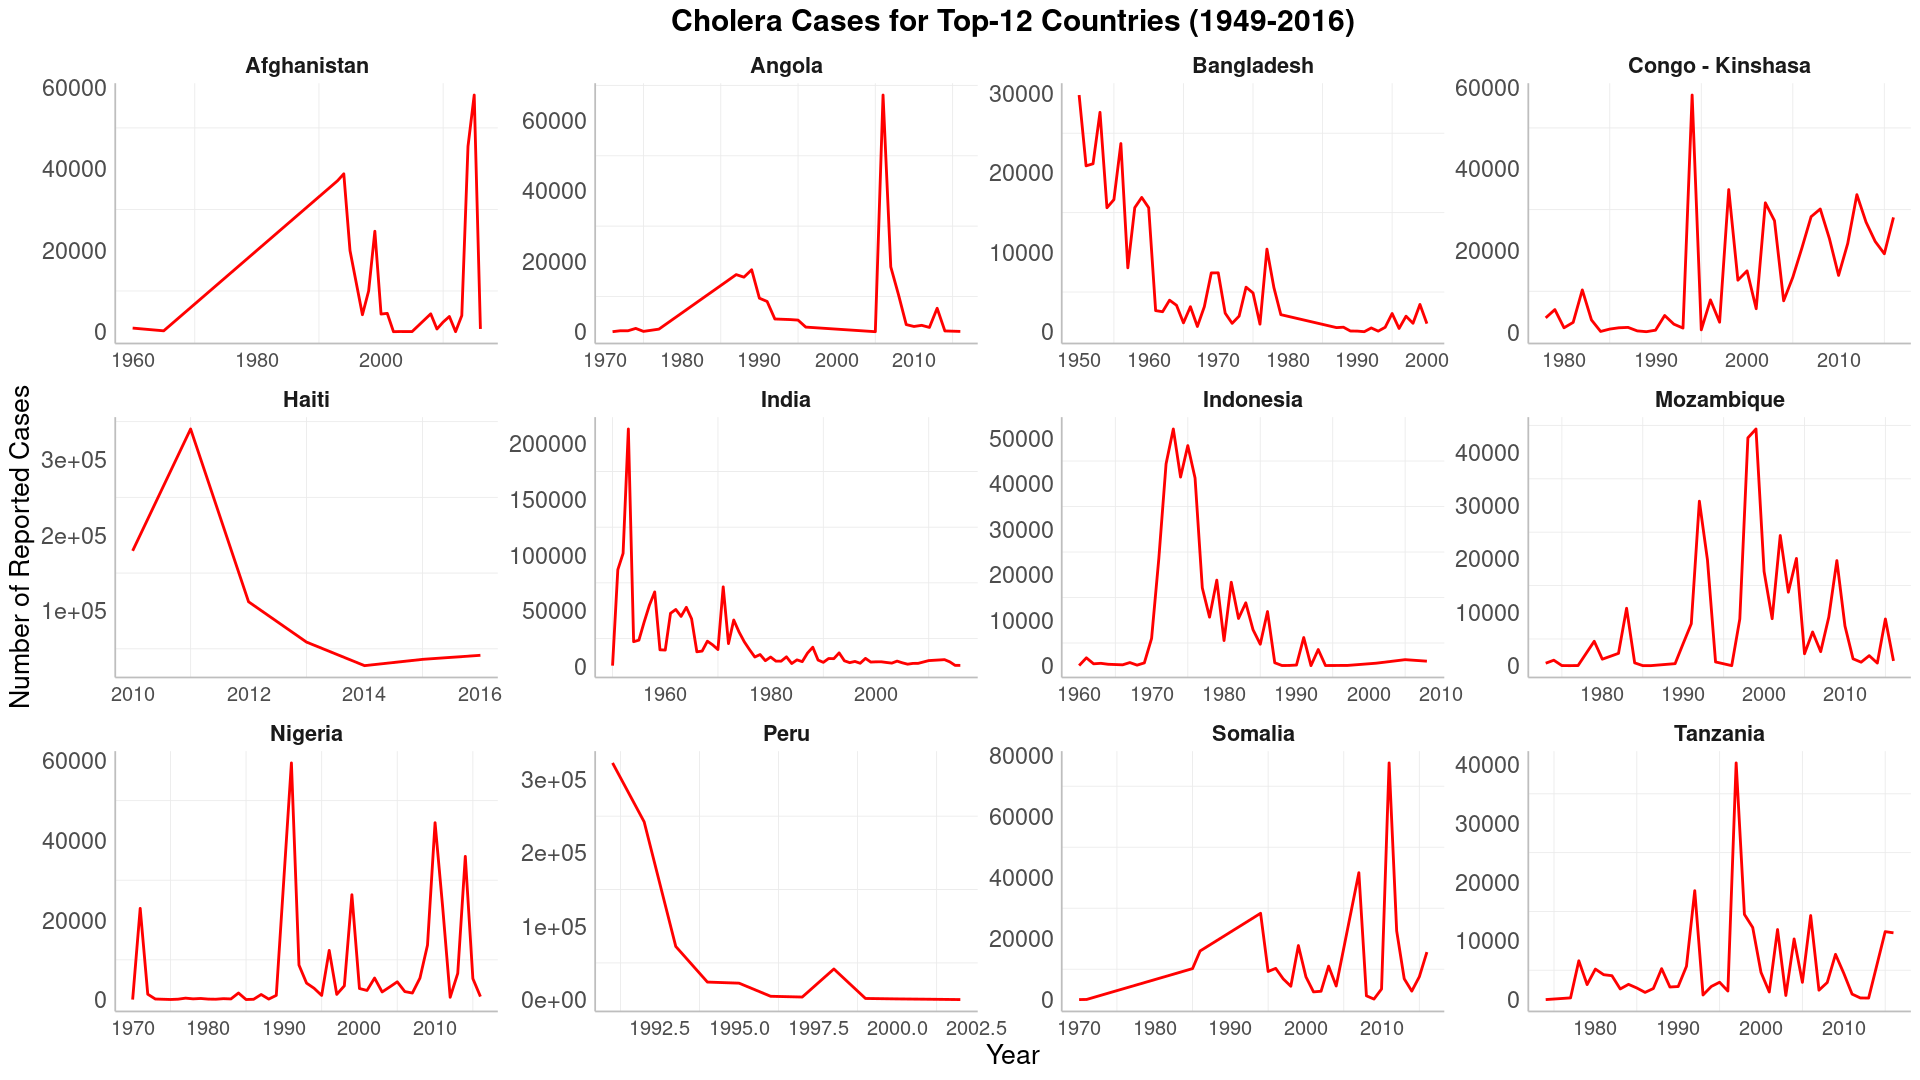

In [41]:
cholera_top_df %>% ggplot(aes(x = year, y = number_of_reported_cases)) +
    geom_line(size = 0.8, color = "Red") +
    labs(title = "Cholera Cases for Top-12 Countries (1949-2016)", x = "Year", y = "Number of Reported Cases") +
    facet_wrap(~country, scales = "free") +
    theme_minimal() +
    theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5), 
          axis.text.x = element_text(size = 12),
          axis.text.y = element_text(size = 14),
          axis.title.x = element_text(size = 16),
          axis.title.y = element_text(size = 16),
          strip.text = element_text(size = 13, face = 'bold'),
          panel.background = element_blank(), 
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          axis.line = element_line(color = "grey"))

In [42]:
cholera_who_subregion_cases <- cholera_df %>% group_by(who_subregion) %>% summarize(total_cases = sum(number_of_reported_cases)) %>% ungroup() %>% ggplot(aes(x = reorder(who_subregion, total_cases), y = total_cases, fill = factor(total_cases))) +
    geom_col(width = 0.7) +
    labs(title = "Reported Cases In WHO Sub-Region's", x = "Year", y = "Reported Cases") +
    coord_flip() +
    theme_minimal() +
    scale_fill_manual(values = death_color_palette) +
    theme(legend.position = "none", 
          plot.title = element_text(size = 18, hjust = 0.5), 
          axis.text.x = element_text(size = 14), 
          axis.text.y = element_text(size = 14), 
          axis.title.x = element_text(size = 16),
          axis.title.y = element_text(size = 16))

In [43]:
cholera_who_subregion_deaths <- cholera_df %>% group_by(who_subregion) %>% summarise(total_deaths = sum(number_of_reported_deaths)) %>% ungroup() %>% ggplot(aes(x = reorder(who_subregion, total_deaths), y = total_deaths, fill = factor(total_deaths))) +
    geom_col(width = 0.7) +
    labs(title = "Reported Deaths In WHO Sub-Region's", x = "Year", y = "Reported Deaths") +
    coord_flip() +
    theme_minimal() +
    scale_fill_manual(values = death_color_palette) +
    theme(legend.position = "none", 
          axis.title.x = element_text(size = 16), 
          axis.title.y = element_text(size = 16), 
          axis.text.x = element_text(size = 14), 
          axis.text.y = element_text(size = 14),
          strip.text = element_text(size = 14), 
          plot.title = element_text(size = 18, hjust = 0.5))

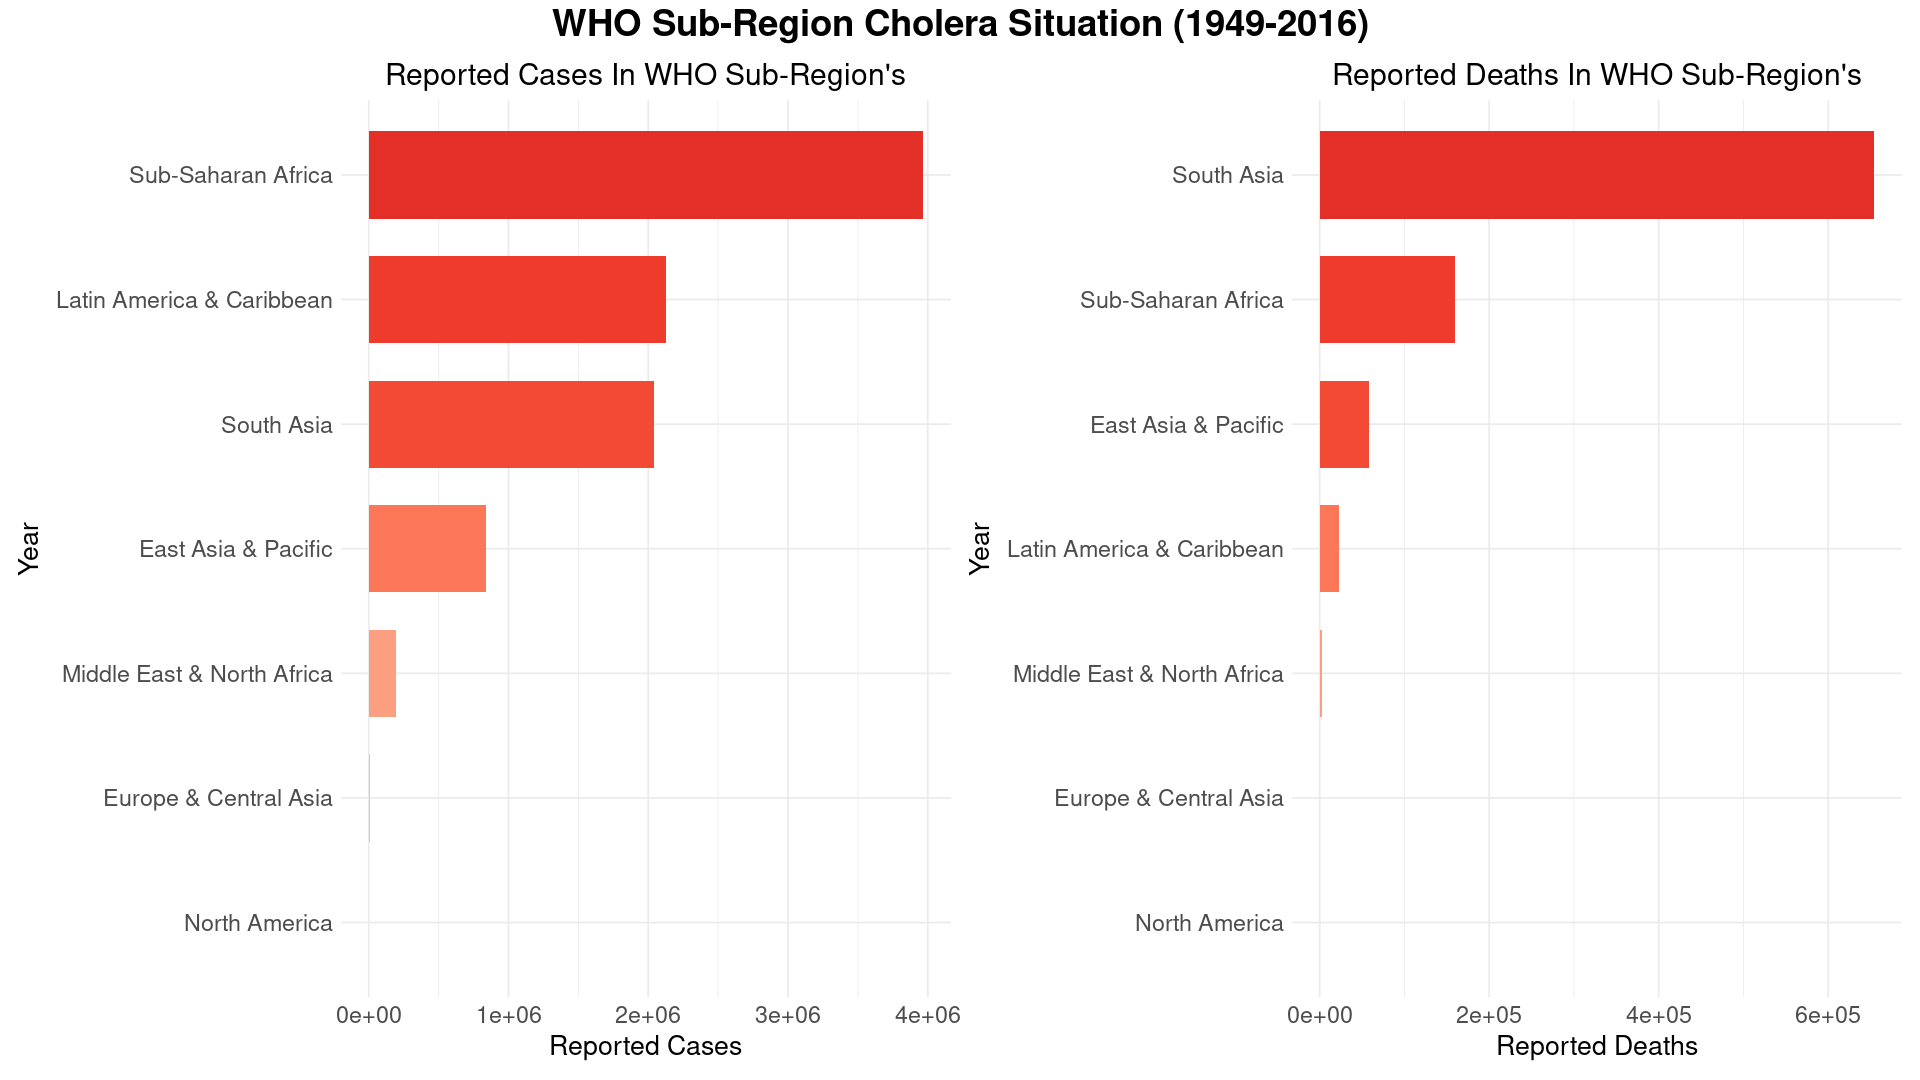

In [44]:
(cholera_who_subregion_cases | cholera_who_subregion_deaths) + 
plot_annotation(title = "WHO Sub-Region Cholera Situation (1949-2016)", 
                theme = theme(plot.title = element_text(size = 22, face = 'bold', hjust = 0.5)))

### Analysis of Last 10 Years of Cholera Disease

In [45]:
cholera_ten_years_df = filter(cholera_df, year > 2006)
head(cholera_ten_years_df)

,country,year,number_of_reported_cases,number_of_reported_deaths,fatality_rate,reported_recovered,reported_recovery_rate,country_iso_code,who_region,who_subregion
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Afghanistan,2008,4384,22,0.50,4362,99.49818,AFG,Asia,South Asia
2,Afghanistan,2009,662,11,1.66,651,98.33837,AFG,Asia,South Asia
3,Afghanistan,2010,2369,10,0.42,2359,99.57788,AFG,Asia,South Asia
4,Afghanistan,2011,3733,44,1.18,3689,98.82132,AFG,Asia,South Asia
5,Afghanistan,2012,12,0,0.10,12,100.00000,AFG,Asia,South Asia
6,Afghanistan,2013,3957,14,0.35,3943,99.64620,AFG,Asia,South Asia


In [46]:
countrywise_ten_years_cases <- cholera_ten_years_df %>% group_by(country) %>% summarize(total_cases = sum(number_of_reported_cases), total_deaths = sum(number_of_reported_deaths)) %>% ungroup() %>% arrange(desc(total_deaths)) %>% head(10) %>% ggplot(aes(x = reorder(country, total_cases), y = total_cases, fill = factor(total_cases))) +
    geom_col(width = 0.8) +
    labs(title = "Cholera Cases Reported", x = "Country", y = "Total Cases Reported") +
    coord_flip() +
    theme_minimal() +
    scale_fill_manual(values = death_color_palette) +
    theme(axis.title.x = element_text(size = 16), 
          axis.title.y = element_text(size = 16), 
          axis.text.x = element_text(size = 14), 
          axis.text.y = element_text(size = 14), 
          plot.title = element_text(size = 18, hjust = 0.5),
          legend.position = "none")

In [47]:
country_wise_ten_years_deaths <- cholera_ten_years_df %>% group_by(country) %>% summarize(total_deaths = sum(number_of_reported_deaths)) %>% ungroup() %>% arrange(desc(total_deaths)) %>% head(10) %>% ggplot(aes(x = reorder(country, total_deaths), y = total_deaths, fill = factor(total_deaths))) +
    geom_col(width = 0.8) +
    labs(title = "Cholera Deaths Reported", x = "Country", y = "Total Deaths Reported") +
    coord_flip() +
    theme_minimal() +
    scale_fill_manual(values = death_color_palette) +
    theme(axis.title.x = element_text(size = 16), 
          axis.title.y = element_text(size = 16), 
          axis.text.x = element_text(size = 14), 
          axis.text.y = element_text(size = 14), 
          legend.position = 'none', 
          plot.title = element_text(size = 18, hjust = 0.5))

In [48]:
last_ten_year_cases <- cholera_year_wise_df %>% arrange(desc(year)) %>% head(10) %>% ggplot(aes(x = year, y = total_cases)) +
    geom_line(size = 0.8, color = 'red') +
    labs(title = "Cases of Cholera (2007-2016)", x = "Year", y = "Reported Cases") +
    theme_minimal() +
    scale_fill_manual(values = death_color_palette) +
    theme(axis.text.x = element_text(size = 14),
          axis.text.y = element_text(size = 14),
          axis.title.x = element_text(size = 16),
          axis.title.y = element_text(size = 16),
          legend.position = "none", 
          plot.title = element_text(size = 18, hjust = 0.5))

In [49]:
last_ten_year_death <- cholera_year_wise_df %>% arrange(desc(year)) %>% head(10) %>% ggplot(aes(x = year, y = total_deaths)) +
    geom_line(size = 0.8, color = 'red') +
    labs(title = "Deaths From Cholera (2007-2016)", x = "Year", y = "Reported Deaths") +
    scale_fill_manual(values = death_color_palette) +
    theme_minimal() +
    theme(axis.text.x = element_text(size = 14), 
          axis.text.y = element_text(size = 14),
          axis.title.x = element_text(size = 14),
          axis.title.y = element_text(size = 14),
          legend.position = "none", 
          plot.title = element_text(size = 18, hjust = 0.5))

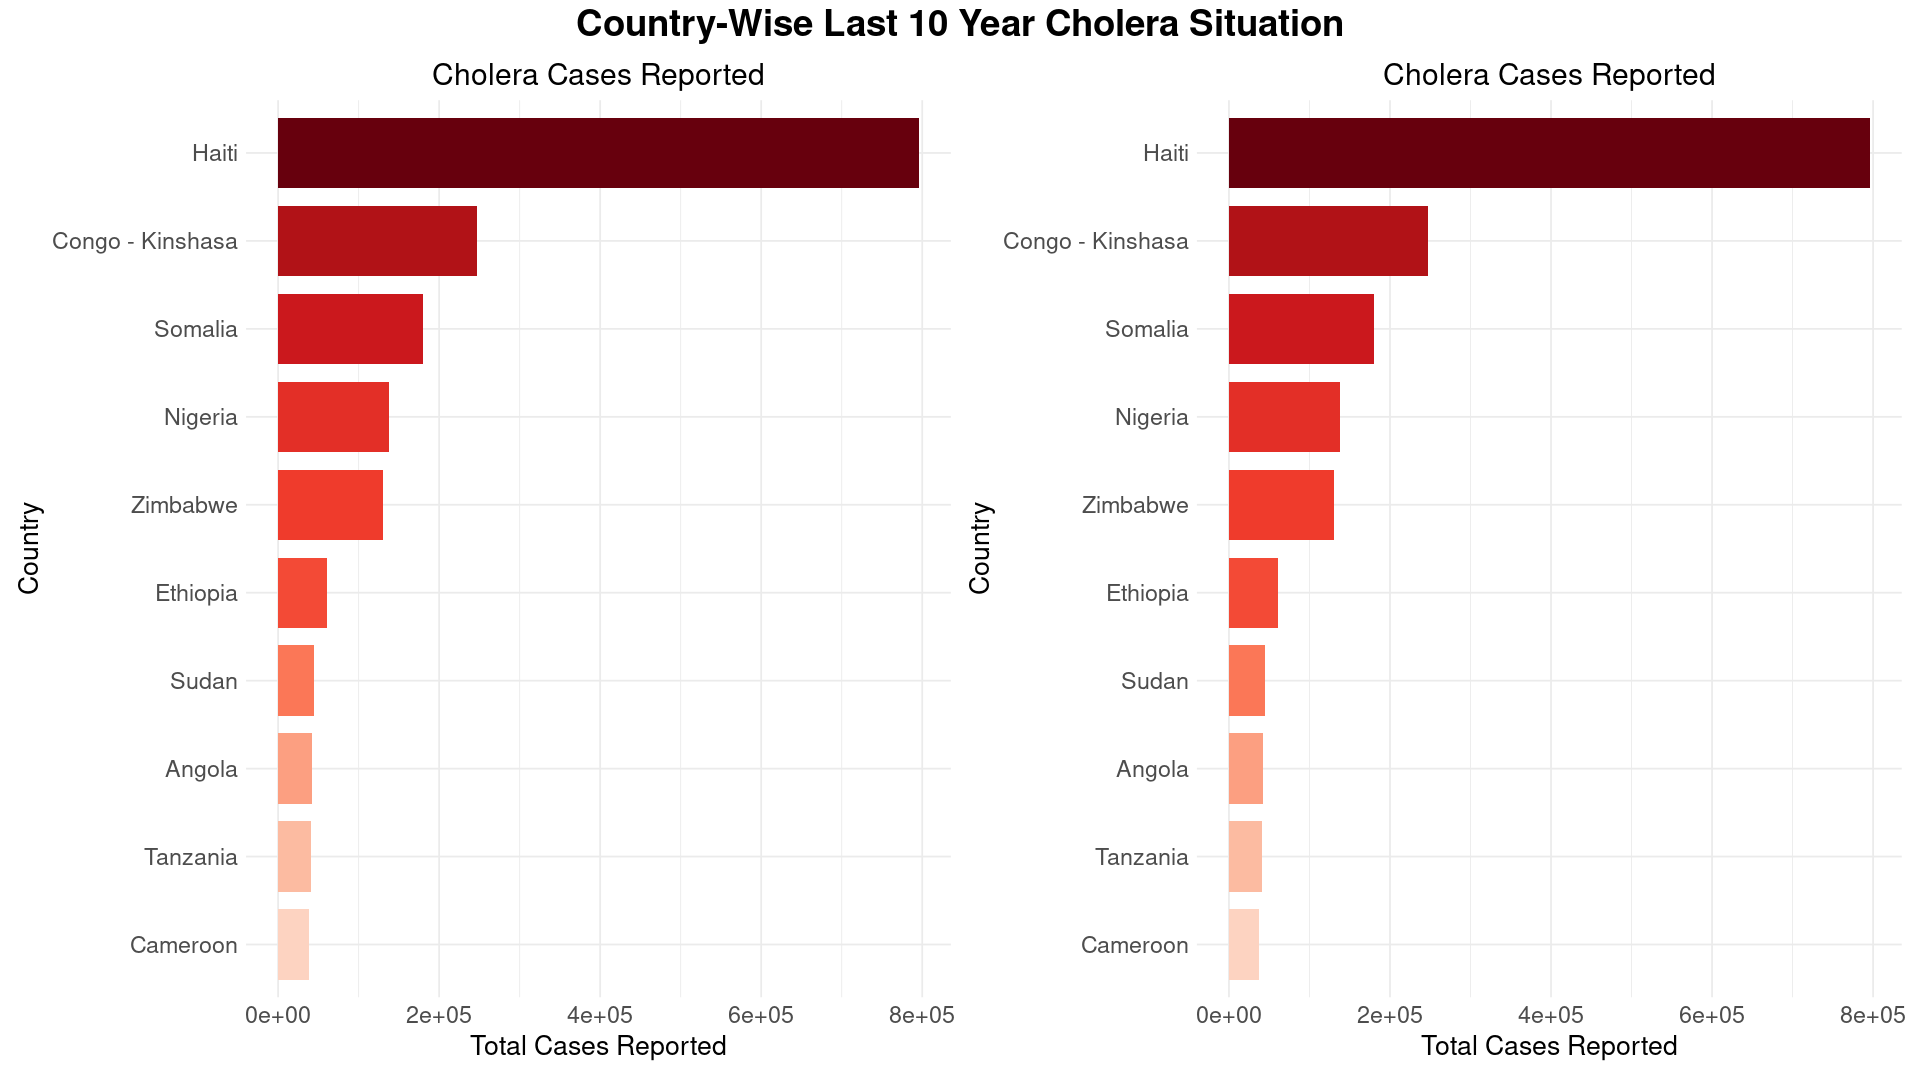

In [50]:
countrywise_ten_years_cases + countrywise_ten_years_cases + 
    plot_annotation(title = "Country-Wise Last 10 Year Cholera Situation", 
                    theme = theme(plot.title = element_text(size = 22, face = 'bold', hjust = 0.5)))

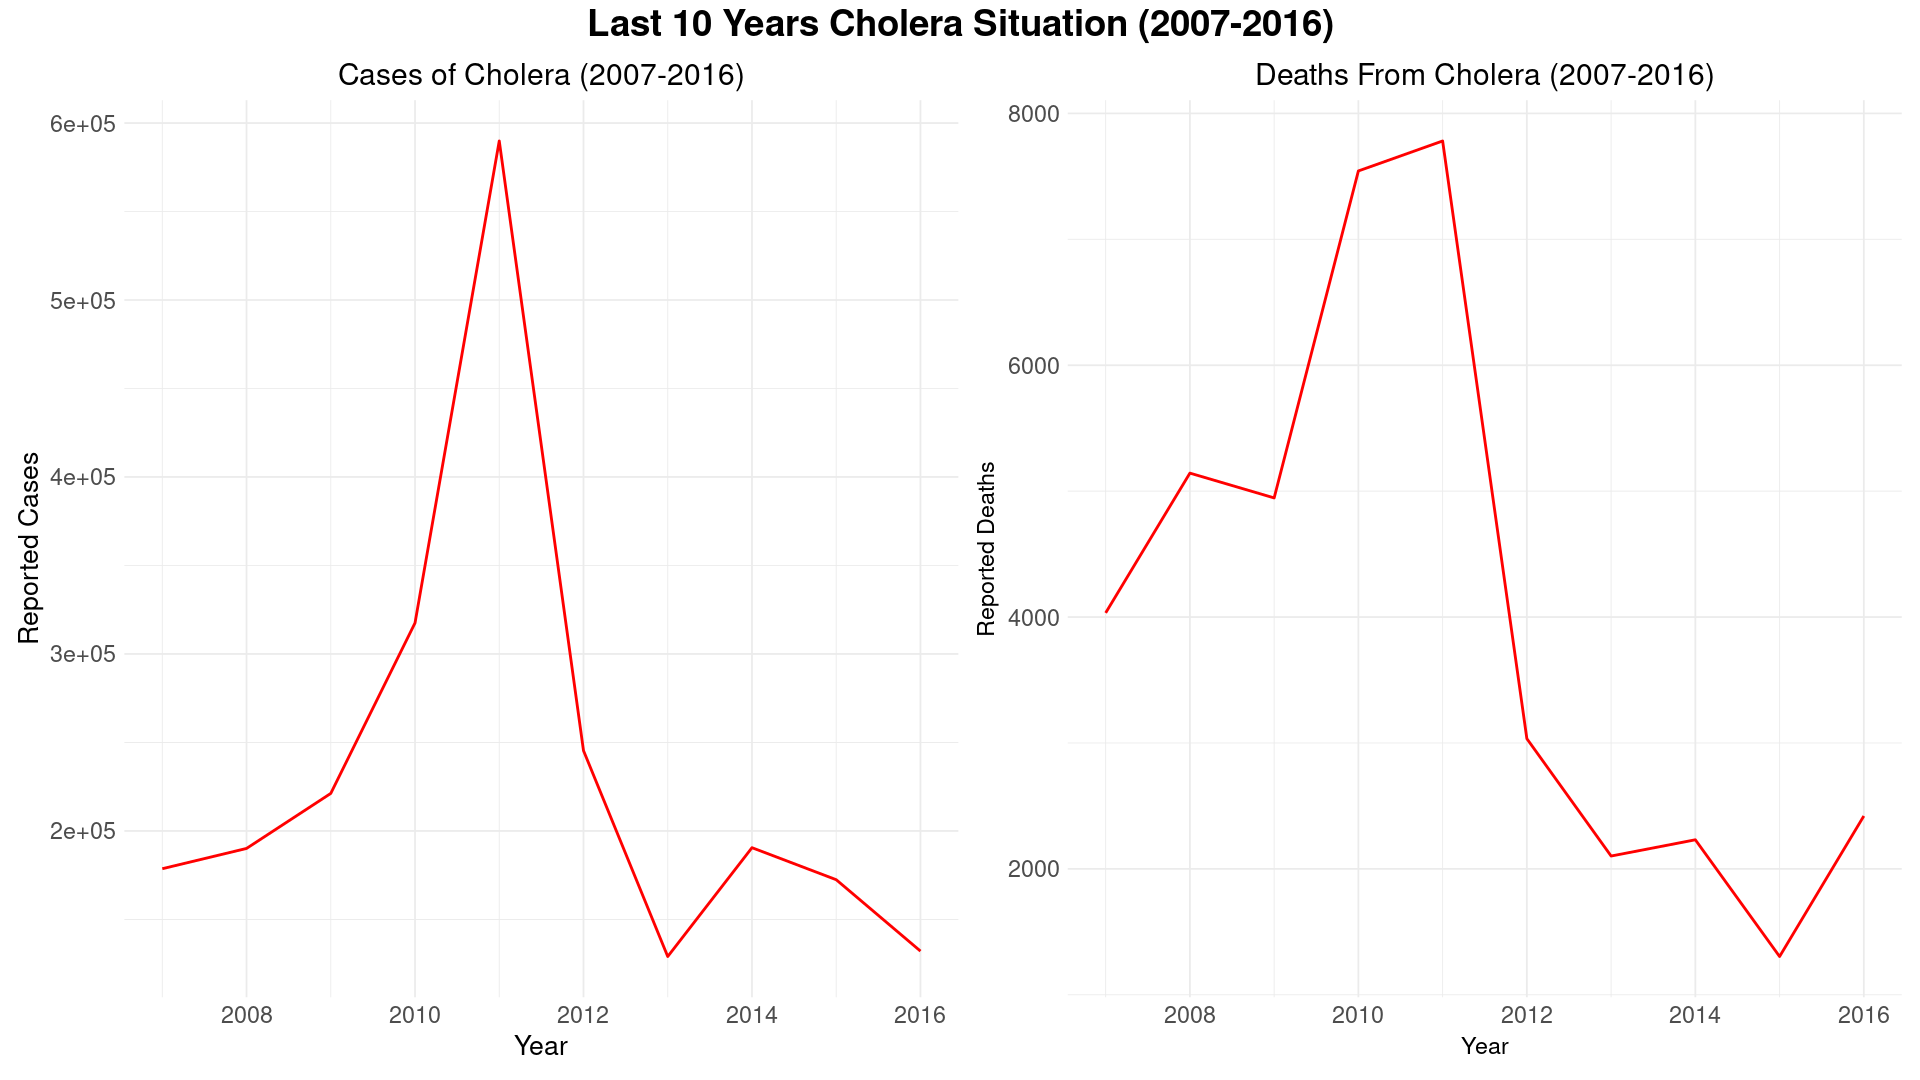

In [51]:
last_ten_year_cases + last_ten_year_death + plot_annotation(title = "Last 10 Years Cholera Situation (2007-2016)", theme = theme(plot.title = element_text(size = 22, face = 'bold', hjust = 0.5)))

In [52]:
cholera_year_2010_df <- filter(cholera_df, year == 2010)
head(cholera_year_2010_df)

,country,year,number_of_reported_cases,number_of_reported_deaths,fatality_rate,reported_recovered,reported_recovery_rate,country_iso_code,who_region,who_subregion
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Afghanistan,2010,2369,10,0.42,2359,99.57788,AFG,Asia,South Asia
2,Angola,2010,1484,30,2.02,1454,97.97844,AGO,Africa,Sub-Saharan Africa
3,Australia,2010,3,0,0.00,3,100.00000,AUS,Oceania,East Asia & Pacific
4,Benin,2010,983,8,0.81,975,99.18616,BEN,Africa,Sub-Saharan Africa
5,Burundi,2010,333,1,0.30,332,99.69970,BDI,Africa,Sub-Saharan Africa
6,Cambodia,2010,588,1,0.17,587,99.82993,KHM,Asia,East Asia & Pacific


In [53]:
cholera_2010_country_wise <- cholera_year_2010_df %>% group_by(country) %>% summarize(total_cases = sum(number_of_reported_cases), 
                                                                                      total_deaths = sum(number_of_reported_deaths), 
                                                                                      avg_recovery_rate = mean(reported_recovery_rate), 
                                                                                      avg_fatality = mean(fatality_rate)) %>% ungroup() %>% arrange(desc(total_cases))
head(cholera_2010_country_wise)

country,total_cases,total_deaths,avg_recovery_rate,avg_fatality
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Haiti,179379,3990,97.77566,2.22
Nigeria,44456,1712,96.14900,3.85
Congo - Kinshasa,13884,182,98.68914,1.31
Cameroon,10759,657,93.89348,6.10
Papua New Guinea,8997,95,98.94409,1.06
Mozambique,7430,117,98.42530,1.57


In [54]:
cholera_2010_cases <- cholera_2010_country_wise %>% head(10) %>% ggplot(aes(x = reorder(country, total_cases), y = total_cases, fill = factor(total_cases))) +
    geom_col(width = 0.8) +
    labs(title = "Country-Wise Cholera Cases (2010)", x = "Country", y = "Reported Cases") +
    coord_flip() +
    scale_fill_manual(values = death_color_palette) +
    theme_minimal() +
    theme(axis.text.x = element_text(size = 14), 
          axis.text.y = element_text(size = 14),
          axis.title.x = element_text(size = 14),
          axis.title.y = element_text(size = 14),
          legend.position = "none", 
          plot.title = element_text(size = 18, hjust = 0.5))

In [55]:
cholera_2010_deaths <- cholera_2010_country_wise %>% arrange(desc(total_deaths)) %>% head(10) %>% ggplot(aes(x = reorder(country, total_deaths), y = total_deaths, fill = factor(total_deaths))) +
    geom_col(width = 0.6) +
    labs(title = "Country-Wise Cholera Deaths (2010)", x = "Country", y = "Reported Deaths") +
    coord_flip() +
    scale_fill_manual(values = death_color_palette) +
    theme_minimal() +
    theme(axis.text.x = element_text(size = 14), 
          axis.text.y = element_text(size = 14),
          axis.title.x = element_text(size = 14),
          axis.title.y = element_text(size = 14),
          legend.position = "none", 
          plot.title = element_text(size = 18, hjust = 0.5))

In [56]:
cholera_year_2011_df <- filter(cholera_df, year == 2011)
head(cholera_year_2011_df)

,country,year,number_of_reported_cases,number_of_reported_deaths,fatality_rate,reported_recovered,reported_recovery_rate,country_iso_code,who_region,who_subregion
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Afghanistan,2011,3733,44,1.18,3689,98.82132,AFG,Asia,South Asia
2,Angola,2011,1810,110,6.08,1700,93.92265,AGO,Africa,Sub-Saharan Africa
3,Australia,2011,6,0,0.00,6,100.00000,AUS,Oceania,East Asia & Pacific
4,Bahamas,2011,1,0,0.00,1,100.00000,BHS,Americas,Latin America & Caribbean
5,Benin,2011,755,4,0.53,751,99.47020,BEN,Africa,Sub-Saharan Africa
6,Brazil,2011,1,0,0.00,1,100.00000,BRA,Americas,Latin America & Caribbean


In [57]:
cholera_2011_country_wise_df = cholera_year_2011_df %>% group_by(country) %>% summarise(total_cases = sum(number_of_reported_cases), 
                                                                                        total_deaths = sum(number_of_reported_deaths), 
                                                                                        avg_recovery_rate = mean(reported_recovery_rate), 
                                                                                        avg_fatality = mean(fatality_rate)) %>% ungroup() %>% arrange(desc(total_cases))
head(cholera_2011_country_wise_df)

country,total_cases,total_deaths,avg_recovery_rate,avg_fatality
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Haiti,340311,2869,99.15695,0.84
Somalia,77636,1130,98.54449,1.46
Yemen,31789,134,99.57847,0.42
Nigeria,23377,742,96.82594,3.17
Cameroon,22433,783,96.50961,3.49
Congo - Kinshasa,21700,584,97.30876,2.69


In [58]:
cholera_2011_cases <- cholera_2011_country_wise_df %>% head(10) %>% ggplot(aes(x = reorder(country, total_cases), y = total_cases, fill = factor(total_cases))) +
    geom_col(width = 0.6) +
    labs(title = "Country-Wise Cholera Cases (2011)", x = "Country", y = "Reported Cases") +
    coord_flip() +
    scale_fill_manual(values = death_color_palette) +
    theme_minimal() +
    theme(axis.text.x = element_text(size = 14), 
          axis.text.y = element_text(size = 14),
          axis.title.x = element_text(size = 14),
          axis.title.y = element_text(size = 14),
          legend.position = "none", 
          plot.title = element_text(size = 18, hjust = 0.5))

In [59]:
cholera_2011_deaths <- cholera_2011_country_wise_df %>% arrange(desc(total_deaths)) %>% head(10) %>% ggplot(aes(x = reorder(country, total_deaths), y = total_deaths, fill = factor(total_deaths))) +
    geom_col(width = 0.6) +
    labs(title = "Country-Wise Cholera Deaths (2011)", x = "Country", y = "Reported Deaths") +
    coord_flip() +
    scale_fill_manual(values = death_color_palette) +
    theme_minimal() +
    theme(axis.text.x = element_text(size = 14), 
          axis.text.y = element_text(size = 14),
          axis.title.x = element_text(size = 14),
          axis.title.y = element_text(size = 14),
          legend.position = "none", 
          plot.title = element_text(size = 18, hjust = 0.5))

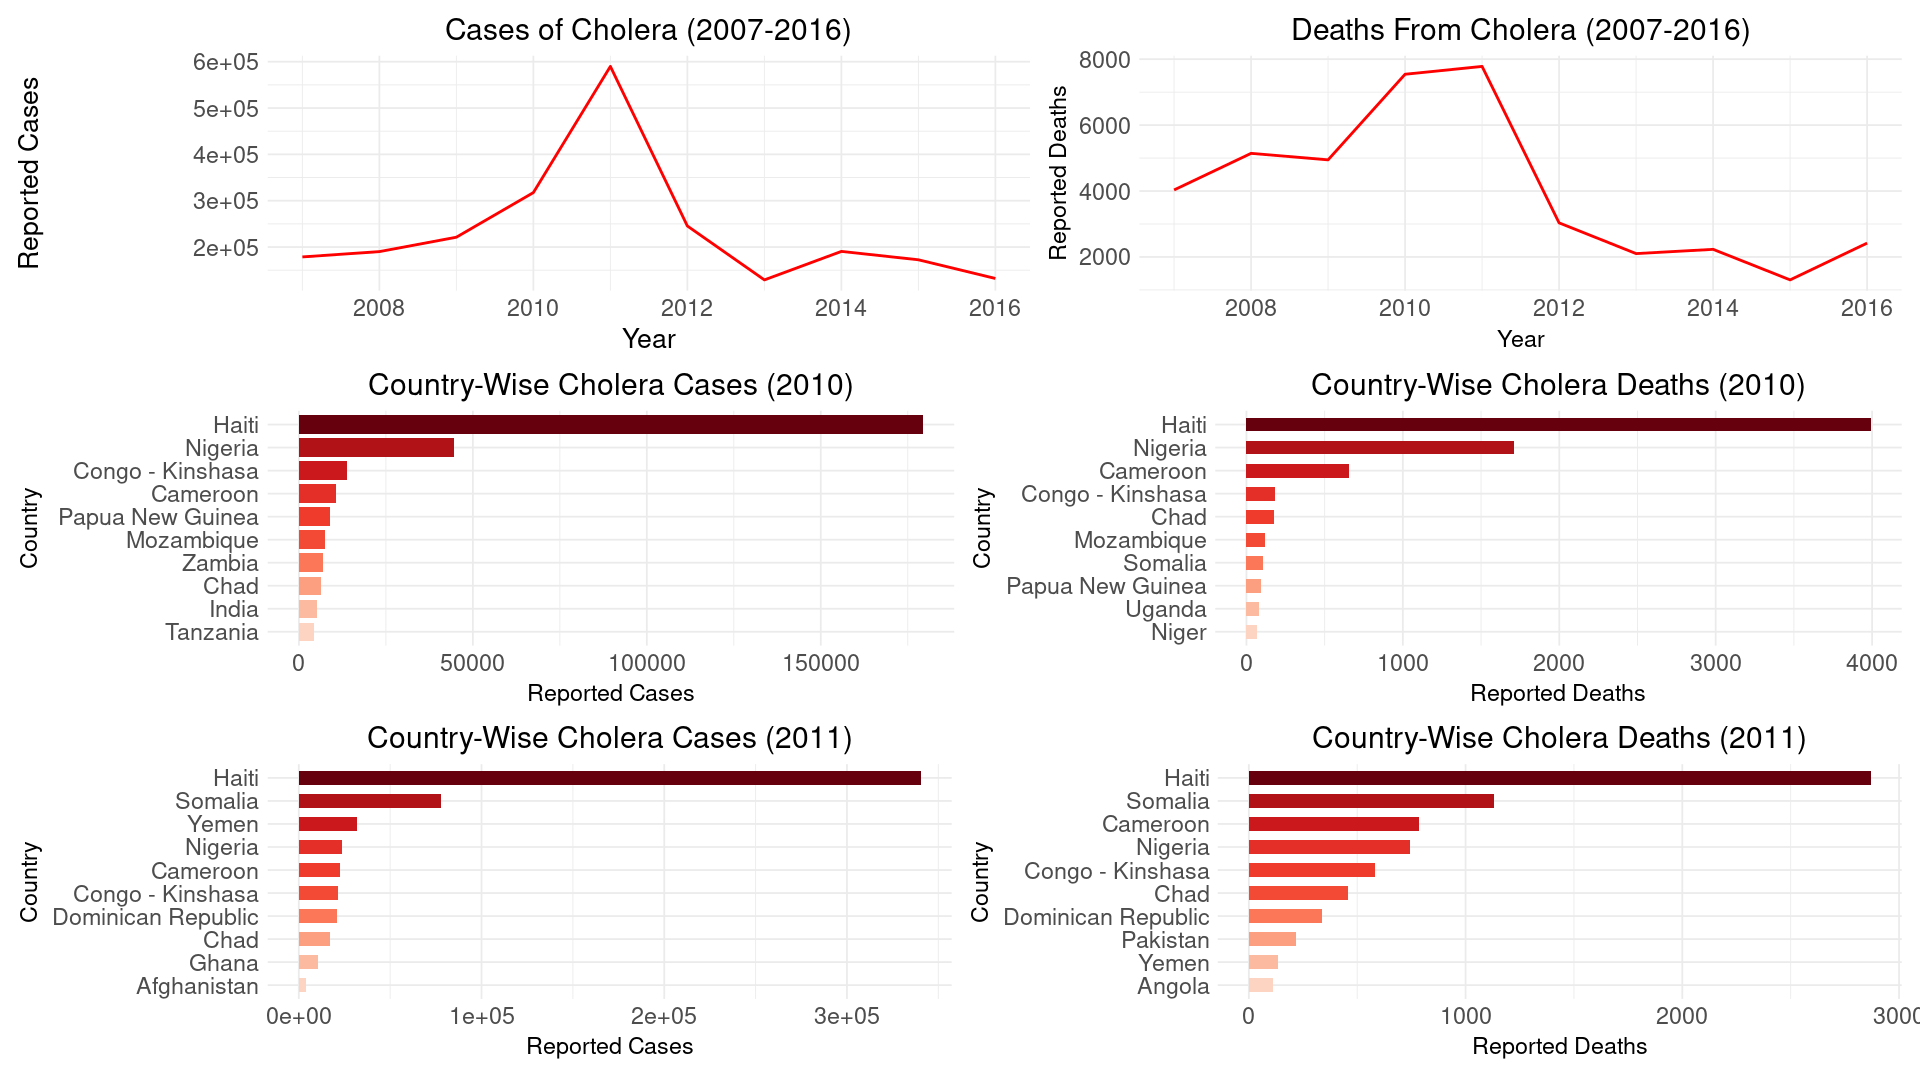

In [60]:
(last_ten_year_cases | last_ten_year_death) / (cholera_2010_cases | cholera_2010_deaths) / (cholera_2011_cases | cholera_2011_deaths)

In [61]:
cholera_who_subregion_df <- cholera_ten_years_df %>% group_by(who_subregion) %>% summarise(total_cases = sum(number_of_reported_cases), 
                                                                                           total_deaths = sum(number_of_reported_deaths)) %>% ungroup() %>% arrange(desc(total_cases))
head(cholera_who_subregion_df)

who_subregion,total_cases,total_deaths
<chr>,<dbl>,<dbl>
Sub-Saharan Africa,1285897,29440
Latin America & Caribbean,830028,9914
South Asia,148064,480
Middle East & North Africa,68133,417
East Asia & Pacific,34457,285
Europe & Central Asia,255,1


In [62]:
cholera_who_subregion_ten_year_cases <- cholera_who_subregion_df %>% ggplot(aes(x = reorder(who_subregion, total_cases), y = total_cases, fill = factor(total_cases))) +
    geom_col(width = 0.6) +
    labs(title = "WHO Sub-Region Cholera Cases (2007-2016)", x = "WHO Sub-Region", y = "Reported Cases") +
    coord_flip() +
    scale_fill_manual(values = death_color_palette) +
    theme_minimal() +
    theme(axis.text.x = element_text(size = 14), 
          axis.text.y = element_text(size = 14),
          axis.title.x = element_text(size = 14),
          axis.title.y = element_text(size = 14),
          legend.position = "none", 
          plot.title = element_text(size = 18, hjust = 0.5))

In [63]:
cholera_who_subregion_ten_year_deaths <- cholera_who_subregion_df %>% arrange(desc(total_deaths)) %>% ggplot(aes(x = reorder(who_subregion, total_deaths), y = total_deaths, fill = factor(total_deaths))) +
    geom_col(width = 0.6) +
    labs(title = "WHO Sub-Region Cholera Deaths (2007-2016)", x = "WHO Sub-Region", y = "Recorded Deaths") +
    coord_flip() +
    scale_fill_manual(values = death_color_palette) +
    theme_minimal() +
    theme(axis.text.x = element_text(size = 14), 
          axis.text.y = element_text(size = 14),
          axis.title.x = element_text(size = 14),
          axis.title.y = element_text(size = 14),
          legend.position = "none", 
          plot.title = element_text(size = 18, hjust = 0.5))

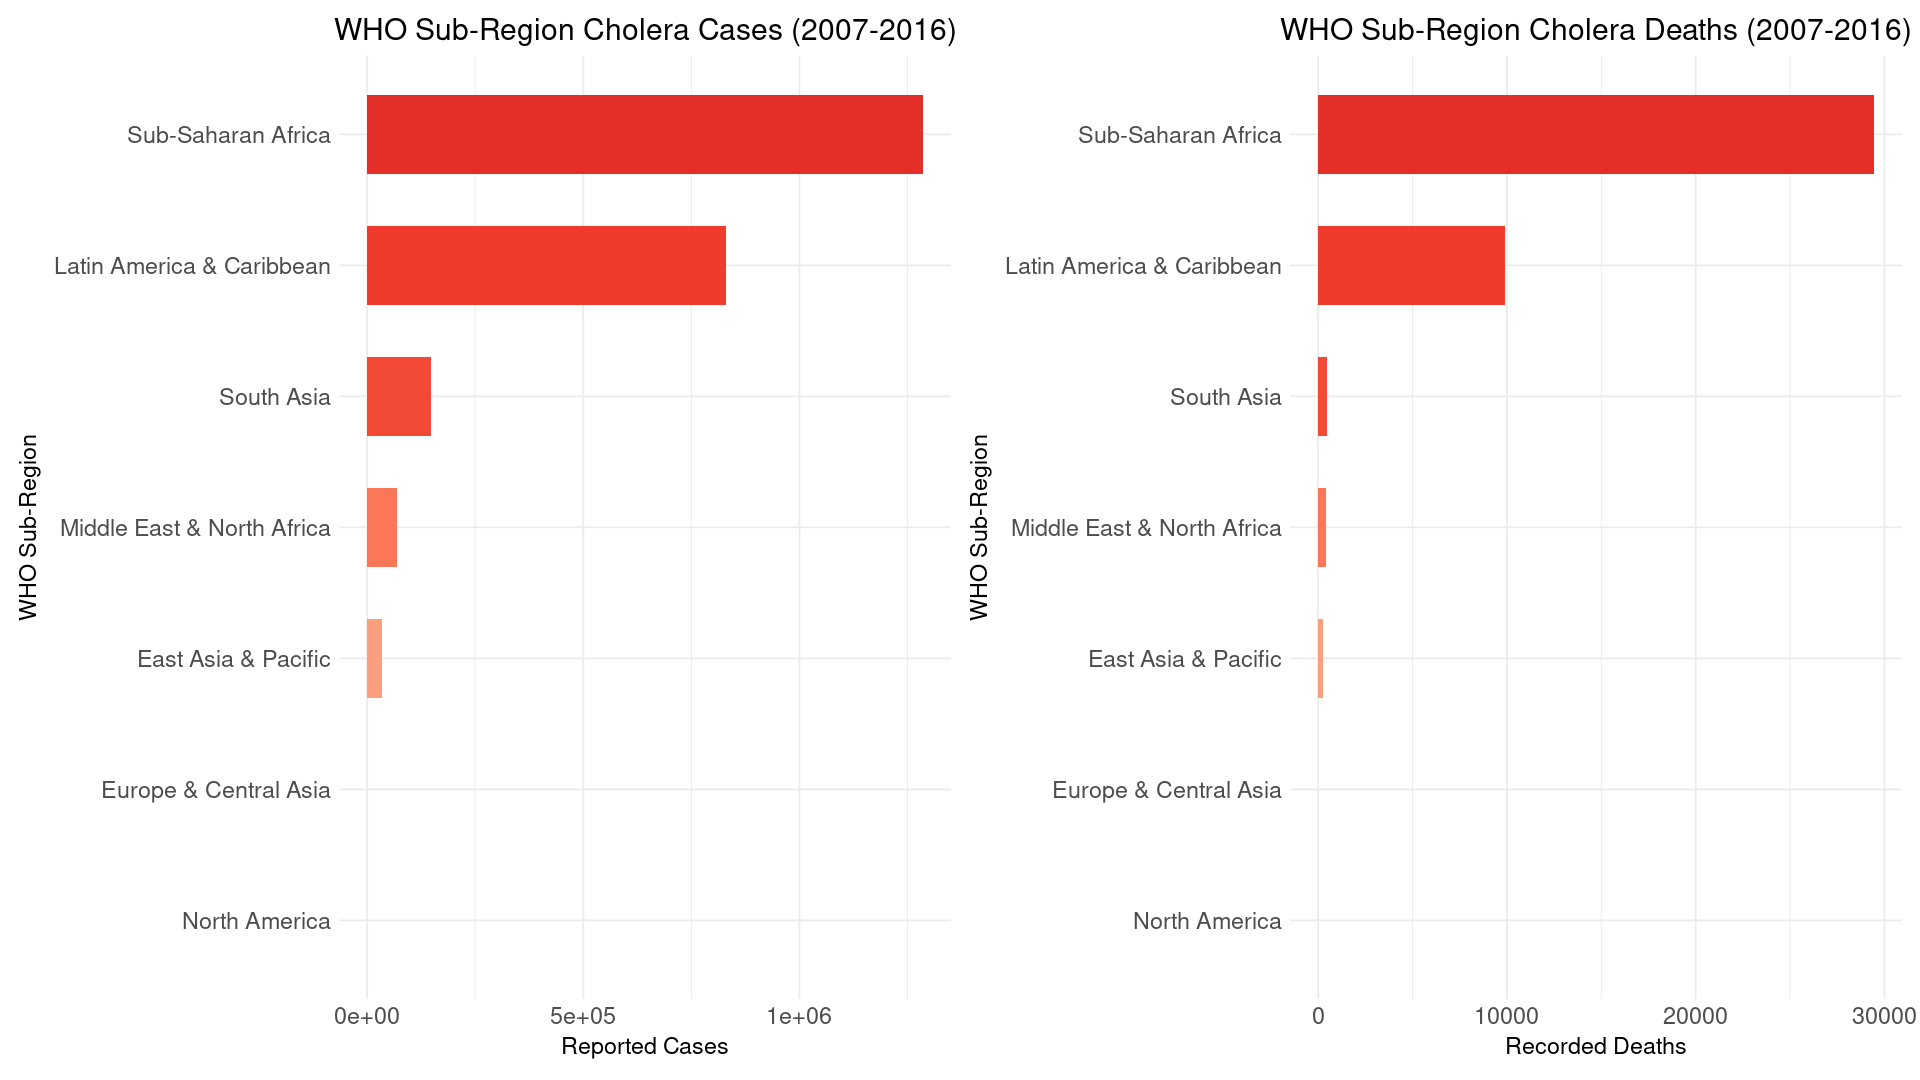

In [64]:
(cholera_who_subregion_ten_year_cases | cholera_who_subregion_ten_year_deaths)

## 5.Conclusions  

* From the data standpoint, we would like to highlight some observations:

    * The data is not rich because of which a very detailed analysis for every country was not possible since sufficient amount of data was not available for all the countries.  

    * The data wasn't very cleaned, hence we had to apply a few cleaning techniques at the beginning of our analysis.  
    
    
* We have seen the patterns of Cholera Cases and how it has changed throughout the years. Certain observations that we could infer upon are-

    * Developed nations having very lesser counts of Cholera cases and deaths associated. The highest number of cases as well as the highest number of deaths is available for India. Now this is quite possible considering the high population, sanitation problems and disturbed political scenerio of India during 1950-70 period. Although India have taken serious setps and improved upon their condition now.
    
    * Haiti is a small country in the Caribbean Islands. The Country is not having a strong economy, and due to the environmental drawbacks, the counts there is still high yet they have been able to control the death rates, and that is a great point.